In [3]:
#!chromosight quantify --pattern hairpins --threads=12 data/hairpins_25.bedpe data/wt.combined.MG1655.mapq30.25.cool hairpins.AGav

In [ ]:
# !chromosight detect --pattern hairpins --threads=4 --min-separation=200 data/wt.combined.MG1655.mapq30.25.mcool::/resolutions/25 data/hairpins_25 

In [1]:
import pandas as pd
import cooler
import cooltools
import bioframe as bf
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bootstrap
import seaborn as sns
os.chdir('/home/izhegalova/ecoli_microc')
from textwrap import wrap
from matplotlib import font_manager
font_dirs = ["/home/izhegalova/fonts/"]  # The path to the custom font file.
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
susielu = ["#b84873", "#6dbc5f","#5a3789","#bdab3d","#6d80d8","#bd7635","#bf68b8","#46c19a","#ba4b41","#71883b"]
sns.set_theme(context="paper", style='whitegrid', palette=susielu, font="Arial")

In [2]:
# colors
# Create an array with the colors you want to use
susielu = ["#b84873", "#6dbc5f","#5a3789","#bdab3d","#6d80d8","#bd7635","#bf68b8","#46c19a","#ba4b41","#71883b"] # Set your custom color palette
# susielu_pal = sns.set_palette(sns.color_palette(susielu))
susielu_greyscale = ["#636363", "#a4a4a4","#444444", "#a7a7a7", "#828282",] # Set your custom color palette
# susielu_greyscale_pal = sns.set_palette(sns.color_palette(susielu_greyscale))
susielu_accent = ["#636363", "#b84873", "#a4a4a4","#444444", "#a7a7a7", "#828282",] 
sns.set_theme(context="paper", style='whitegrid', palette=susielu) #, font="Arial"
cm = 1/2.54  # centimeters in inches

In [3]:
# %% create bins
resolution = 10
clr = cooler.Cooler('data/wt.combined.MG1655.mapq30.10.mcool::resolutions/' + str(resolution))
df_chromsizes = clr.chromsizes
bins = cooler.binnify(df_chromsizes, 25)
bins.chrom = bins.chrom.astype(str)
fasta_records = bf.load_fasta('data/genome.fasta')
view_df_chromsizes = clr.chromsizes.reset_index()
view_df_chromsizes.columns = ['chrom', 'end']
view_df_chromsizes['start'] = 0
view_df_chromsizes['name'] = 'NC_000913.3'
view_df_chromsizes = view_df_chromsizes[['chrom', 'start', 'end', 'name']]

# preprocess feature annotation

In [20]:
df = pd.read_excel('data/hairpins_Gavrilov.xlsx')

hairpins_df_bedpe = pd.DataFrame({
    'chrom1': 'NC_000913.3',
    'start1': df.wt_left//25*25,
    'end1': (df.wt_left//25+1)*25,
    'chrom2': 'NC_000913.3',
    'start2': df.wt_right//25*25,
    'end2': (df.wt_right//25+1)*25,
})

hairpins_df_bed = pd.DataFrame({
    'chrom': 'NC_000913.3',
    'start': df.wt_left//25*25,
    'end': (df.wt_right//25+1)*25,
})
# hairpins_df_bedpe.to_csv('data/hairpins_25.bedpe', sep='\t', 
# index=False, header=False)
# hairpins_df_bed.to_csv('data/hairpins_25.bed', sep='\t', index=False, header=False)

hairpins_df_Pseudobedpe = pd.DataFrame({
    'chrom1': 'NC_000913.3',
    'start1': df.wt_middle//25*25,
    'end1': (df.wt_middle//25+1)*25,
    'chrom2': 'NC_000913.3',
    'start2': df.wt_middle//25*25,
    'end2': (df.wt_middle//25+1)*25,
})

hairpinsMiddle_df =pd.DataFrame({
    'chrom': 'NC_000913.3',
    'start': df.wt_middle//25*25,
    'end': (df.wt_middle//25+1)*25,
})


hairpins_df_middleOfShouldes = pd.DataFrame({
    'chrom1': 'NC_000913.3',
    'start1': (df.wt_left+df.wt_right)/4//25*25,
    'end1': (df.wt_left+df.wt_right)/4//25*25+25,
    'chrom2': 'NC_000913.3',
    'start2': (df.wt_right-(df.wt_right-df.wt_left)/4)//25*25,
    'end2': (df.wt_right-(df.wt_right-df.wt_left)/4)//25*25+25,
})
hairpins_df_middleOfShouldes.to_csv('data/hairpins_25.middleOfShouldes.bedpe', sep='\t', index=False, header=False)


hairpins_df_middleOfShouldes_50 = pd.DataFrame({
    'chrom1': 'NC_000913.3',
    'start1': (df.wt_left+df.wt_right)/4//25*25,
    'end1': (df.wt_left+df.wt_right)/4//25*25+50,
    'chrom2': 'NC_000913.3',
    'start2': (df.wt_right-(df.wt_right-df.wt_left)/4)//25*25,
    'end2': (df.wt_right-(df.wt_right-df.wt_left)/4)//25*25+50,
})
tmp1 = pd.DataFrame({
    'chrom': 'NC_000913.3',
    'start': (df.wt_left+df.wt_right)/4//25*25,
    'end': (df.wt_left+df.wt_right)/4//25*25+50
})
tmp2 = pd.DataFrame({
    'chrom': 'NC_000913.3',
    'start': (df.wt_right-(df.wt_right-df.wt_left)/4)//25*25,
    'end': (df.wt_right-(df.wt_right-df.wt_left)/4)//25*25+50,
})
tmp = pd.concat([tmp1,tmp2])
tmp.start = tmp.start.astype(int)
tmp.end = tmp.end.astype(int)
tmp.to_csv('data/hairpins_50.middleOfShouldes.bed', sep='\t', index=False, header=False)
hairpins_df_middleOfShouldes_50.to_csv('data/hairpins_50.middleOfShouldes.bedpe', sep='\t', index=False, header=False)
#hairpins_df_Pseudobedpe.to_csv('data/hairpins_25.pseudo.bedpe', sep='\t', index=False, header=False)
# hairpinsMiddle_df.to_csv('data/hairpins_25.middle.bed', sep='\t', index=False, header=False)
tmp.head()

,chrom,start,end
0,NC_000913.3,29400,29450
1,NC_000913.3,42325,42375
2,NC_000913.3,75650,75700
3,NC_000913.3,75900,75950
4,NC_000913.3,76150,76200


In [5]:
hairpins_df_bedpe['length'] = hairpins_df_bedpe.start2 - hairpins_df_bedpe.end1
hairpins_df_bedpe.length.median()

2050.0

In [4]:
# df = pd.read_csv('data/TADs with hairpins - hptads.csv')
df = pd.read_excel('data/hpTADs_counts_corrected.xlsx')
df.head()
hairpins_df_bedpe = pd.DataFrame({
    'chrom1': 'NC_000913.3',
    'start1': df.Start//25*25,
    'end1': (df.Start//25+1)*25,
    'chrom2': 'NC_000913.3',
    'start2': df.End//25*25,
    'end2': (df.End//25+1)*25,
})
# hairpins_df_bedpe.to_csv('data/hTADS_25.bedpe', sep='\t', index=False, header=False)

hairpins_df_bed = pd.DataFrame({
    'chrom1': 'NC_000913.3',
    'start1': df.Start//25*25,
    'end2': (df.End//25+1)*25,
})
hairpins_df_bed.to_csv('data/hTADS_25.bed', sep='\t', index=False, header=False)

In [7]:
df = pd.read_csv('data/TADs count - tads.counts.csv')
hairpins_df_bedpe = pd.DataFrame({
    'chrom1': 'NC_000913.3',
    'start1': df.start//25*25,
    'end1': (df.start//25+1)*25,
    'chrom2': 'NC_000913.3',
    'start2': df.end//25*25,
    'end2': (df.end//25+1)*25,
})
# hairpins_df_bedpe.to_csv('data/TADS_25.bedpe', sep='\t', index=False, header=False)

In [5]:
# operons_df = pd.read_excel('data/operon_counts.xlsx', index_col=0)

In [9]:
TU_df = pd.read_csv('data/Operon_TU_counts.tsv', sep='\t', index_col=0)
TU_df.columns = ['chrom', 'start', 'end', 'TU_name', 'strand', 'GeneID', 'genes', 'ngenes', 
                 'protein_codin', 
                 'sigma', 'nascent_wt',
                 'totat_wt', 'nascent_wt44', 'totat_wt44']
TU_df['chrom'] = 'NC_000913.3'
TU_df = TU_df.query('protein_codin == True')
TU_df['length'] = TU_df.end - TU_df.start
bin_labels_4 = ['short', '25-50%', '50-75%', 'long']
TU_df['length_group'] = pd.qcut(TU_df['length'], 4, labels=False)
TU_df['lengthBool_group'] = np.where(TU_df['length'] > TU_df.length.median(), 'long', 'short')

bin_labels_4 = ['bottom 50%', '50-75%', '75-90%', '>90%']
TU_df['nascentCust_group'] = pd.qcut(TU_df['nascent_wt'], 
                                          q=[0, .5, .75, .9, 1],
                                          labels=bin_labels_4)
# bin_labels_nascent = ['0-33.3%', '33.3%-66.6%', '66.6-100%']
# TU_df['nascent_group'] = pd.qcut(TU_df['nascent_wt'], 3, labels=bin_labels_nascent)
TU_df.head()

TU_df.loc[:,['chrom', 'start', 'end', 'TU_name', 'ngenes', 'strand']].to_csv(
    'data/TUpc.bed', sep='\t', index=False, header=False) 
TU_df.query('nascentCust_group == ">90%"').loc[:,['chrom', 'start', 'end', 'TU_name', 'ngenes', 'strand']].to_csv(
    'data/TUpc.nascTop10.bed', sep='\t', index=False, header=False) 
TU_df.query('nascent_wt == 0').loc[:,['chrom', 'start', 'end', 'TU_name', 'ngenes', 'strand']].to_csv(
    'data/TUpc.nascBot25.bed', sep='\t', index=False, header=False) 
TU_df.query('nascent_wt > 0 and nascentCust_group != ">90%"').loc[:,['chrom', 'start', 'end', 'TU_name', 'ngenes', 'strand']].to_csv(
    'data/TUpc.average.bed', sep='\t', index=False, header=False) 

# lifOver chain generation

In [91]:
%%bash
#NC_000913.2 -> NC_000913.3
source ~/.bashrc
source activate liftOver_env;
cd data/
pyoverchain sequence.NC_000913.2.fasta genome.fasta ../chr_map.2_3 -p 32

[pyoverchain:2024-05-16 21:15:10.875007] Begin separating NC_000913.2 from sequence.NC_000913.2.fasta...
[pyoverchain:2024-05-16 21:15:10.933341] Begin separating NC_000913.3 from genome.fasta...
[pyoverchain:2024-05-16 21:15:10.977997] Begin building chains by 2 parallel tasks...
Running: 1 chromosomes Finished (100%)|#########################|Time:  0:00:02
[pyoverchain:2024-05-16 21:15:12.996310] Combining Results...


In [90]:
%%bash
#W3110 -> NC_000913.3
source ~/.bashrc
source activate liftOver_env;
cd data/
pyoverchain sequence.W3110.fasta genome.fasta ../chr_map -p 32

[pyoverchain:2024-05-16 21:14:31.684910] Begin separating NC_007779.1 from sequence.W3110.fasta...
[pyoverchain:2024-05-16 21:14:31.819591] Begin separating NC_000913.3 from genome.fasta...
[pyoverchain:2024-05-16 21:14:31.865126] Begin building chains by 2 parallel tasks...
Running: 1 chromosomes Finished (100%)|#########################|Time:  0:00:02
[pyoverchain:2024-05-16 21:14:33.883978] Combining Results...


In [4]:
%%bash
#W3110 -> NC_000913.3
# wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE117nnn/GSE117186/suppl/GSE117186%5FE%5Fcoli%5Fw3110%5FG%5FMu%2Efasta%2Egz
source ~/.bashrc
source activate liftOver_env;
cd ../data/
pyoverchain E_coli_w3110_G_Mu.fasta genome.fasta ../chr_map_Wmu -p 8

[pyoverchain:2024-06-11 17:41:24.928398] Begin separating NC_007779.1_w3110_Mu from E_coli_w3110_G_Mu.fasta...
[pyoverchain:2024-06-11 17:41:24.961247] Begin separating NC_000913.3 from genome.fasta...
[pyoverchain:2024-06-11 17:41:24.991414] Begin building chains by 2 parallel tasks...
Running: 1 chromosomes Finished (100%)|#########################|Time:  0:00:02
[pyoverchain:2024-06-11 17:41:27.007395] Combining Results...


# TopoI

In [212]:
%%bash
cd data/topoI
#wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5529nnn/GSM5529907/suppl/GSM5529907%5FTopoI%5FAra%5FIP%5F1%5FN3E%5FF%2Ewig%2Egz
#wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5529nnn/GSM5529907/suppl/GSM5529907%5FTopoI%5FAra%5FIP%5F1%5FN3E%5FR%2Ewig%2Egz
#wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5529nnn/GSM5529907/suppl/GSM5529907%5FTopoI%5FAra%5FIP%5F1%5Fdepth%2Ewig%2Egz

wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5529nnn/GSM5529908/suppl/GSM5529908%5FTopoI%5FAra%5FIP%5F2%5FN3E%5FF%2Ewig%2Egz
wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5529nnn/GSM5529908/suppl/GSM5529908%5FTopoI%5FAra%5FIP%5F2%5FN3E%5FR%2Ewig%2Egz
wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5529nnn/GSM5529908/suppl/GSM5529908%5FTopoI%5FAra%5FIP%5F2%5Fdepth%2Ewig%2Egz

wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5529nnn/GSM5529909/suppl/GSM5529909%5FTopoI%5FAra%5FIP%5F3%5FN3E%5FF%2Ewig%2Egz
wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5529nnn/GSM5529909/suppl/GSM5529909%5FTopoI%5FAra%5FIP%5F3%5FN3E%5FR%2Ewig%2Egz
wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5529nnn/GSM5529909/suppl/GSM5529909%5FTopoI%5FAra%5FIP%5F3%5Fdepth%2Ewig%2Egz
gunzip *.gz

--2024-06-15 11:16:16--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5529nnn/GSM5529908/suppl/GSM5529908%5FTopoI%5FAra%5FIP%5F2%5FN3E%5FF%2Ewig%2Egz
Resolving proxy (proxy)... 10.64.2.122
Connecting to proxy (proxy)|10.64.2.122|:3128... connected.
Proxy request sent, awaiting response... 200 OK
Length: 1720584 (1.6M) [application/x-gzip]
Saving to: ‘GSM5529908_TopoI_Ara_IP_2_N3E_F.wig.gz’

     0K .......... .......... .......... .......... ..........  2% 1.26K 21m34s
    50K .......... .......... ..........

Process is interrupted.


In [197]:
%%bash
source ~/.bashrc
source activate liftOver_env;
cd data/
ls topoI/ | grep wig | head

GSM5529907_TopoI_Ara_IP_1_depth.wig
GSM5529907_TopoI_Ara_IP_1_depth.wig.bg
GSM5529907_TopoI_Ara_IP_1_depth.wig.MG1655.bg
GSM5529907_TopoI_Ara_IP_1_depth.wig.MG1655.srt.bg
GSM5529907_TopoI_Ara_IP_1_N3E_F.wig
GSM5529907_TopoI_Ara_IP_1_N3E_F.wig.bg
GSM5529907_TopoI_Ara_IP_1_N3E_F.wig.MG1655.bg
GSM5529907_TopoI_Ara_IP_1_N3E_F.wig.MG1655.srt.bg
GSM5529907_TopoI_Ara_IP_1_N3E_R.wig
GSM5529907_TopoI_Ara_IP_1_N3E_R.wig.bg


In [200]:
%%bash
#topoI -  W3110
source ~/.bashrc
source activate liftOver_env;
cd data/
for file in topoI/*.wig;
do 
wig2bed < ${file} > ${file}.bg;
liftOver ${file}.bg sequence.W3110.fasta.to.genome.fasta.over.chain \
${file}.MG1655.bg tmp; 
# head ${file}.MG1655.bg 
sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -d -1 -c 5 -o sum -i \
stdin > ${file}.MG1655.srt.bg;
bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \
${file}.bw;
rm ${file}.MG1655.bg;
rm ${file}.bg;
rm ${file}.MG1655.srt.bg;
done
mv topoI/*.bw bw/
# topo-seq/Un_IP_Mu_1_edt_for_rev_depth.wig - W3110

In [73]:
%%bash
ls data/topoI/ | grep "srt.np"

GSM5514277_EcTopoI_1_peaks.narrowPeak.MG1655.srt.np
GSM5514278_EcTopoI_2_peaks.narrowPeak.MG1655.srt.np
GSM5514279_EcTopoI_3_peaks.narrowPeak.MG1655.srt.np
GSM5514289_EcTopoI_Rif_1_peaks.narrowPeak.MG1655.srt.np
GSM5514290_EcTopoI_Rif_2_peaks.narrowPeak.MG1655.srt.np
GSM5514291_EcTopoI_Rif_3_peaks.narrowPeak.MG1655.srt.np


In [80]:
topoi_dic = {89:'Rif_1', 90:'Rif_2', 91:'Rif_3', 
             77:'1', 78:'2', 79:'3'}
for id in topoi_dic.keys():
    chipseq_df = pd.read_csv(
        "data/topoI/GSM55142%s_EcTopoI_%s_peaks.narrowPeak.MG1655.srt.np" % (id, topoi_dic[id]), 
        header=None, sep='\t')
    chipseq_df.columns = ['chrom', 'start', 'end']
    chipseq_df_cov = bf.coverage(bins, chipseq_df)
    chipseq_df_cov['frac'] = chipseq_df_cov.coverage*100 / 25

    bf.to_bigwig(df=chipseq_df_cov.loc[:,['chrom', 'start', 'end', 'frac']], chromsizes=df_chromsizes,
                            outpath='data/bw/EcTopoI_%s.25.bw' % topoi_dic[id],
                            path_to_binary='/home/izhegalova/.conda/envs/liftOver_env/bin/bedGraphToBigWig')

# Topo-seq

In [36]:
%%bash
cd data/
#wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE182nnn/GSE182473/suppl/GSE182473%5FFinal%5Fprocessed%5Ftracks%5Fwig%2Etar%2Egz
# tar xvf GSE182473_Final_processed_tracks_wig.tar.gz
# mv TopoI* topo-seq/
ls topo-seq/ | grep wig | head
#4648001

TopoI_Ara_N3E_F_masked_scaled_av_123_mock_subtr.wig
TopoI_Ara_N3E_F_masked_scaled_av_123_subtr_mock_subtr_no_Ara.wig
TopoI_Ara_N3E_R_masked_scaled_av_123_mock_subtr.wig
TopoI_Ara_N3E_R_masked_scaled_av_123_subtr_mock_subtr_no_Ara.wig
TopoI_N3E_F_masked_scaled_av_123_mock_subtr.wig
TopoI_N3E_R_masked_scaled_av_123_mock_subtr.wig
Un_IN_3_edt_for_rev_depth.wig
Un_IN_3_edt_N3E.wig
Un_IN_Mu_1_edt_for_rev_depth.wig
Un_IN_Mu_1_edt_N3E.wig


In [32]:
%%bash
#topo-seq - W3110
source ~/.bashrc
source activate liftOver_env;
cd data/
for file in topo-seq/TopoI*.wig;
do 
# wig2bed < ${file} > ${file}.bg; #| sed 's/_w3110_Mu//g'
# liftOver ${file}.bg E_coli_w3110_G_Mu.fasta.to.genome.fasta.over.chain \
# ${file}.MG1655.bg tmp; 
# sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -i \
# stdin -d -1 -c 5 -o sum  > ${file}.MG1655.srt.bg;
# bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \
#  ${file}.bw;
rm ${file}.MG1655.bg;
rm ${file}.bg;
rm ${file}.MG1655.srt.bg;
done

mv topo-seq/*.bw bw/


bash: line 4: cd: ../data/: No such file or directory
rm: cannot remove 'topo-seq/TopoI*.wig.MG1655.bg': No such file or directory
rm: cannot remove 'topo-seq/TopoI*.wig.bg': No such file or directory
rm: cannot remove 'topo-seq/TopoI*.wig.MG1655.srt.bg': No such file or directory
mv: cannot stat 'topo-seq/*.bw': No such file or directory


CalledProcessError: Command 'b"#topo-seq - W3110\nsource ~/.bashrc\nsource activate liftOver_env;\ncd ../data/\nfor file in topo-seq/TopoI*.wig;\ndo \n# wig2bed < ${file} > ${file}.bg; #| sed 's/_w3110_Mu//g'\n# liftOver ${file}.bg E_coli_w3110_G_Mu.fasta.to.genome.fasta.over.chain \\\n# ${file}.MG1655.bg tmp; \n# sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -i \\\n# stdin -d -1 -c 5 -o sum  > ${file}.MG1655.srt.bg;\n# bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \\\n#  ${file}.bw;\nrm ${file}.MG1655.bg;\nrm ${file}.bg;\nrm ${file}.MG1655.srt.bg;\ndone\n\nmv topo-seq/*.bw bw/\n"' returned non-zero exit status 1.

# GyrA

In [70]:
%%bash
pwd
cd data/gyrA/
ls
#wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM3273nnn/GSM3273139/suppl/GSM3273139%5FCfx%5FIP%5FMu%5F10mkM%5F1%2Etar%2Egz
# unzip *.zip
mv */*.wig .

/home/izhegalova/ecoli_microc
GSE117186_RAW
GSE117186_RAW.zip
GSM5511056_gyra_expo_1.gff
GSM5511057_gyra_expo_2.gff
GSM5511058_gyrb_expo_1.gff
GSM5511059_gyrb_expo_2.gff


In [79]:
%%bash
#E. coli w3110 MuSGS
source ~/.bashrc
source activate liftOver_env;
cd data/
# for file in gyrA/*_IP_*.wig;
# do 
# # sed -i "s/\t\t/\t/g" ${file}
# # wig2bed < ${file} > ${file}.bg;
# # liftOver ${file}.bg E_coli_w3110_G_Mu.fasta.to.genome.fasta.over.chain \
# # ${file}.MG1655.bg tmp; 
# # head ${file}.MG1655.bg
# sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -i \
# stdin -d -1 -c 5 -o sum  > ${file}.MG1655.srt.bg;
# # head ${file}.MG1655.srt.bg
# bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \
# ${file}.bw;
# # rm ${file}.MG1655.bg;
# # rm ${file}.bg;
# # rm ${file}.MG1655.srt.bg;
# done

mv gyrA/*.bw bw/

In [20]:
%%bash
cd data/gyrA/
#wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5511nnn/GSM5511056/suppl/GSM5511056%5Fgyra%5Fexpo%5F1%2Egff%2Egz
#wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5511nnn/GSM5511057/suppl/GSM5511057%5Fgyra%5Fexpo%5F2%2Egff%2Egz
#wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5511nnn/GSM5511058/suppl/GSM5511058%5Fgyrb%5Fexpo%5F1%2Egff%2Egz
#wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5511nnn/GSM5511059/suppl/GSM5511059%5Fgyrb%5Fexpo%5F2%2Egff%2Egz
# gunzip *.gff.gz
head GSM5511058_gyrb_expo_1.gff

NC_000913.3		gyrb_expo_1.bam_(+)	40	40	1.00	+	.	.
NC_000913.3		gyrb_expo_1.bam_(+)	41	41	1.00	+	.	.
NC_000913.3		gyrb_expo_1.bam_(+)	42	42	1.00	+	.	.
NC_000913.3		gyrb_expo_1.bam_(+)	43	43	1.00	+	.	.
NC_000913.3		gyrb_expo_1.bam_(+)	44	44	1.00	+	.	.
NC_000913.3		gyrb_expo_1.bam_(+)	45	45	1.00	+	.	.
NC_000913.3		gyrb_expo_1.bam_(+)	46	46	1.00	+	.	.
NC_000913.3		gyrb_expo_1.bam_(+)	47	47	1.00	+	.	.
NC_000913.3		gyrb_expo_1.bam_(+)	48	48	1.00	+	.	.
NC_000913.3		gyrb_expo_1.bam_(+)	49	49	1.00	+	.	.


In [50]:
%%bash
# E.coli genome (NC_000913.3)
source ~/.bashrc
source activate liftOver_env;
cd data/
# gff2bed --do-not-sort < gyrA/GSM5511057_gyra_expo_2.gff #> gyrA/GSM5511057_gyra_expo_2.gff.bg
# head gyrA/GSM5511057_gyra_expo_2.gff.bg
# for file in gyrA/*gyr*.gff;
# do 
# # sed -i "s/gyra_expo_[12].//g" ${file}
# #sed -i "s/\t\t/\t/g" ${file}
# # gff2bed < ${file} | cut -f1-6 > ${file}.bg;
# # cut -f1,3,4,5 ${file} > ${file}.bg;
# sort -k1,1 -k2,2n ${file}.bg > ${file}.srt.bg;
# head ${file}.srt.bg
# bedGraphToBigWig ${file}.srt.bg genome.chrom.sizes \
# ${file}.bw;
# # rm ${file}.bg;
# # rm ${file}.srt.bg;
# done
# mv gyrA/*.bw bw/ 

In [17]:
rpo_dic = {'GSM5511056_gyra_expo_1': 'GSM5511056_gyra_expo_1',
           'GSM5511057_gyra_expo_2': 'GSM5511057_gyra_expo_2',
           'GSM5511058_gyrb_expo_1': 'GSM5511058_gyrb_expo_1',
           'GSM5511059_gyrb_expo_2': 'GSM5511059_gyrb_expo_2',
           }
for id in rpo_dic.keys():
    chipseq_df = pd.read_csv(
        "data/gyrA/%s.gff" % (rpo_dic[id]), 
        header=None, sep='\t')
    chipseq_df.columns = ['chrom', 'source', 'start', 'end', 'value', 'strand','id','summit']
    chipseq_df['end'] = chipseq_df.end + 1
    
    chipseq_df_sum = chipseq_df.groupby(['chrom','start','end'])['value'].sum().reset_index()
    bf.to_bigwig(df=chipseq_df_sum.sort_values(['chrom', 'start']).loc[:,['chrom', 'start', 'end', 'value']], 
                 chromsizes=df_chromsizes,
                 outpath='data/bw/%s.bw' % rpo_dic[id],
                 path_to_binary='/home/izhegalova/.conda/envs/liftOver_env/bin/bedGraphToBigWig')

# SMC

In [162]:
! head -n 2 data/smc/GSE67221_MukB_37deg_20r_WTCTRL_peaks.txt

chr	start	end	length	abs_summit	pileup	-LOG10(pvalue)	fold_enrichment	-LOG10(qvalue)	name
chr	12098	15791	3694	13827	3064	352.17303	2.27983	350.19562	MukB_37deg_20r_WTCTRL_peak_1


In [103]:
chipseq_df = pd.read_csv('data/smc/GSE67221_MukB_37deg_20r_WTCTRL_peaks.txt', comment='#', sep="\t")
chipseq_df['chrom'] = 'NC_000913.3'
# chipseq_df['start'] = chipseq_df.Peak_start
# chipseq_df['end'] = chipseq_df.Peak_end
chipseq_df_cov = bf.coverage(bins, chipseq_df)
# chipseq_df_cov['frac'] = chipseq_df_cov.coverage / 25

bf.to_bigwig(df=chipseq_df_cov, chromsizes=df_chromsizes,
                        outpath='data/bw/%s.25.bw' % 'smc',
                        path_to_binary='/home/izhegalova/.conda/envs/omics_env/bin/bedGraphToBigWig')

CompletedProcess(args=['/home/izhegalova/.conda/envs/omics_env/bin/bedGraphToBigWig', '/scratch/tmp7oitgsgd.bg', '/scratch/tmp_o7kum6u.chrom.sizes', 'data/bw/smc.25.bw'], returncode=0, stdout=b'', stderr=b'')

# GapR

In [224]:
%%bash
#gapR - NC_000913_2
source ~/.bashrc
source activate liftOver_env;
cd data/
for file in gapR/*.wig;
do 
wig2bed < ${file} | sed 's/_2/.2/g' | cut -f1,2,3,5 | \
awk -v OFS='\t' '{ print "NC_000913.2", $3, $3+1, $4}' > ${file}.bg;
liftOver ${file}.bg sequence.NC_000913.2.fasta.to.genome.fasta.over.chain \
${file}.MG1655.bg tmp ; 
sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -i \
stdin -d -1 -c 4 -o sum  > ${file}.MG1655.srt.bg;
bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \
${file}.bw;
rm ${file}.MG1655.bg;
rm ${file}.bg;
rm ${file}.MG1655.srt.bg;
done

mv gapR/*.bw bw/

Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates


In [111]:
%%bash
cd data/gapR/
#wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4628nnn/GSM4628314/suppl/GSM4628314%5FD19%2D11570%2D4278G%5FMG1655%5Fnorm%2Ewig%2Egz
#gunzip *.gz
#wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4628nnn/GSM4628312/suppl/GSM4628312%5FD19%2D11573%2D4278G%5FMG1655%5Fnorm%2Ewig%2Egz
#wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4628nnn/GSM4628313/suppl/GSM4628313%5FD18%2D11475%2D3531L%5Fnorm%2Ewig%2Egz

In [102]:
# import sys
# sys.path.append('/home/fox/projects/dicty/hic_loop_study/scripts/functions/modules/')
# from functions import plot_around_loop, wrapper_stackup
# # %%
# nbins=81
# i=0
# j=0
# fig, axs = plt.subplots(10, 10,figsize=(20,20), 
# sharex='all', sharey='all')
# for id in range(242, 337): #337
#     chipseq_df = pd.read_csv('data/chipseq/RHTECOLIBSD00%s.csv' % id, index_col=0)
#     s_list, order = plot_around_loop(
#         path_bw='data/bw/%s.25.bw' % chipseq_df['TF_name*'][0],
#         plot_name=chipseq_df['TF_name*'][0],
#         nbins=81,
#         resolution=25,
#         chrom_file=df_chromsizes,
#         window=1000,
#         mode="mean",
#         ymin=0,
#         ymax=25,
#         vmin=0,
#         vmax=25,
#         norm=False,
#         fill=True,
#         how_far_from_edge=40,
#         bed_list=[
#             "data/hairpins_25.bedpe",
#         ],
#         pic_path='results/',
#         return_matrix=True
#     )
#     upper_median = np.nanmedian(s_list[0][order, :], axis=0)
#     # tmp = sliding_window(seq=np.mean(s_list[i][order, :], axis=0), half_window_size=2)
#     axs[i,j].set_title(chipseq_df['TF_name*'][0])
#     axs[i,j].plot(upper_median)
#     axs[i,j].set(xticklabels=[])
#     axs[i,j].set_ylim([-1, 10])
#     # err_style
#     to_bootstrap = (s_list[0][order, :],)
#     rng = np.random.default_rng()
#     res = bootstrap(
#     to_bootstrap,
#     np.nanstd,
#     n_resamples=100,
#     confidence_level=0.9,  # vectorized=True,
#     axis=0,
#     random_state=rng,
#     method="basic",
#     )
#     dyfit = res.standard_error

#     axs[i,j].fill_between(
#         range(nbins),
#         upper_median - dyfit,
#         upper_median + dyfit,
#         color="blue",
#         alpha=0.3,
#     )
#     i += 1
#     if i == 10:
#         i = 0
#         j += 1
# fig.savefig('results/chipseq.map_mean.pdf', dpi=100, bbox_inches='tight')
# fig.show()
# fig.clf()

In [19]:
%%bash
source ~/.bashrc
source activate liftOver_env;
# cd data/gapR/
# wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM6569nnn/GSM6569550/suppl/GSM6569550%5FCC%5Fchip16%2Ebw
# wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM6569nnn/GSM6569551/suppl/GSM6569551%5FCC%5Fchip18%2Ebw
# wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM6569nnn/GSM6569552/suppl/GSM6569552%5FCC%5Fchip19%2Ebw
# wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM6569nnn/GSM6569553/suppl/GSM6569553%5FCC%5Fchip20%2Ebw
# wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM6569nnn/GSM6569554/suppl/GSM6569554%5FCC%5Fchip21%2Ebw
# wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM6569nnn/GSM6569555/suppl/GSM6569555%5FCC%5Fchip17%2Ebw
for file in $(ls data/gapR/*.bw)
do
bigWigToBedGraph ${file} ${file}.bg;
awk -v OFS='\t' '{ print "NC_000913.3", $2, $3, $4}' ${file}.bg > ${file}.chrName.bg
bedGraphToBigWig ${file}.chrName.bg data/genome.chrom.sizes ${file}.bigWig
done

In [9]:
%%bash
source ~/.bashrc
source activate liftOver_env;
for file in $(ls data/redC/*.bw)
do
bigWigToBedGraph ${file} ${file}.bg;
awk -v OFS='\t' '{ print "NC_000913.3", $2, $3, $4}' ${file}.bg > ${file}.chrName.bg
bedGraphToBigWig ${file}.chrName.bg data/genome.chrom.sizes ${file}.bigWig
done

# H-NS

In [20]:
# H-NS peaks
hns_dic = {1:'4', 2:'7'}
for id in hns_dic:
    chipseq_df = pd.read_csv('data/h-ns/GSM476908%s_NegRif_HNS%s_peaks.bed' % 
                             (hns_dic[id], id), 
                             comment='#', header=None,
                             sep="\t")
    chipseq_df.columns = ['chrom', 'start', 'end', 'name', 'score']
    chipseq_df['chrom'] = 'NC_000913.3'
    # chipseq_df['start'] = chipseq_df.Peak_start
    # chipseq_df['end'] = chipseq_df.Peak_end
    chipseq_df_cov = bf.coverage(bins, chipseq_df)
    chipseq_df_cov['frac'] = chipseq_df_cov.coverage / 25

    bf.to_bigwig(df=chipseq_df_cov, chromsizes=df_chromsizes,
                            outpath='data/bw/H-NS%s_cov.25.bw' % id,
                            path_to_binary='/home/izhegalova/.conda/envs/omics_env/bin/bedGraphToBigWig')

In [255]:
%%bash
cd data/
tail -n +2 h-ns/GSM4769087_NegRif_HNS2_quantNorm.bedgraph \
> h-ns/HNS2_quantNorm.noHeader.bg
tail -n +2 h-ns/GSM4769084_NegRif_HNS1_quantNorm.bedgraph \
> h-ns/HNS1_quantNorm.noHeader.bg

tail -n +2 h-ns/GSM4769090_PosRif_HNS1_quantNorm.bedgraph \
> h-ns/HNS1+Rif_quantNorm.noHeader.bg
tail -n +2 h-ns/GSM4769093_PosRif_HNS2_quantNorm.bedgraph \
> h-ns/HNS2+Rif_quantNorm.noHeader.bg

tail -n +2 h-ns/GSM4769109_50S1_subtractQ.bedgraph \
> h-ns/StpA1_50mg_quantNorm.noHeader.bg
tail -n +2 h-ns/GSM4769110_50S2_subtractQ.bedgraph \
> h-ns/StpA2_50mg_quantNorm.noHeader.bg
tail -n +2 h-ns/GSM4769111_50S3_subtractQ.bedgraph \
> h-ns/StpA3_50mg_quantNorm.noHeader.bg

tail -n +2 h-ns/GSM4769112_100S1_subtractQ.bedgraph \
> h-ns/StpA1_100mg_quantNorm.noHeader.bg
tail -n +2 h-ns/GSM4769113_100S2_subtractQ.bedgraph \
> h-ns/StpA2_100mg_quantNorm.noHeader.bg
tail -n +2 h-ns/GSM4769114_100S3_subtractQ.bedgraph \
> h-ns/StpA3_100mg_quantNorm.noHeader.bg

In [256]:
%%bash
source ~/.bashrc
source activate liftOver_env;
cd data/
for file in $(ls -1 h-ns/*.noHeader.bg)
do
echo ${file}
bedGraphToBigWig ${file} \
genome.chrom.sizes ${file}.bw
done
mv h-ns/*.bw bw/

h-ns/HNS1_quantNorm.noHeader.bg
h-ns/HNS1+Rif_quantNorm.noHeader.bg
h-ns/HNS2_quantNorm.noHeader.bg
h-ns/HNS2+Rif_quantNorm.noHeader.bg
h-ns/StpA1_100mg_quantNorm.noHeader.bg
h-ns/StpA1_50mg_quantNorm.noHeader.bg
h-ns/StpA2_100mg_quantNorm.noHeader.bg
h-ns/StpA2_50mg_quantNorm.noHeader.bg
h-ns/StpA3_100mg_quantNorm.noHeader.bg
h-ns/StpA3_50mg_quantNorm.noHeader.bg


In [109]:
%%bash
# NC_000913.2 4639675
# !wc -l data/h-ns/HnsB.blat.basecount.pruned
source ~/.bashrc
source activate liftOver_env;
cd data/
for file in h-ns/*.pruned;
do 
awk -v OFS='\t' '{ print "NC_000913.2", $1, $1+1, $2}' ${file} > ${file}.bg
liftOver ${file}.bg sequence.NC_000913.2.fasta.to.genome.fasta.over.chain \
${file}.MG1655.bg tmp; 
sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -i \
stdin -d -1 -c 4 -o sum  > ${file}.MG1655.srt.bg;
bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \
${file}.bw;
rm ${file}.MG1655.bg;
rm ${file}.bg;
rm ${file}.MG1655.srt.bg;
done

mv h-ns/*.bw bw/

Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates


# Fis

In [237]:
%%bash
cd data/
ls h-ns/ | grep F
#gunzip h-ns/*.gz

GSM4769106_12F1_subtractQ.bedgraph
GSM4769106_12F1_subtractQ.bedgraph.noHeader.bg
GSM4769106_12F3_subtractQ.noHeader.bg
GSM4769107_12F2_subtractQ.bedgraph
GSM4769107_12F2_subtractQ.noHeader.bg
GSM4769108_12F3_subtractQ.bedgraph
GSM4769108_12F3_subtractQ.noHeader.bg


In [243]:
%%bash
cd data/
tail -n +2 h-ns/GSM4769106_12F1_subtractQ.bedgraph \
> h-ns/GSM4769106_12F1_subtractQ.noHeader.bg
tail -n +2 h-ns/GSM4769107_12F2_subtractQ.bedgraph \
> h-ns/GSM4769107_12F2_subtractQ.noHeader.bg
tail -n +2 h-ns/GSM4769108_12F3_subtractQ.bedgraph \
> h-ns/GSM4769108_12F3_subtractQ.noHeader.bg

source ~/.bashrc
source activate liftOver_env;
bedGraphToBigWig h-ns/GSM4769106_12F1_subtractQ.noHeader.bg \
genome.chrom.sizes bw/Fis1.bw
bedGraphToBigWig h-ns/GSM4769107_12F2_subtractQ.noHeader.bg \
genome.chrom.sizes bw/Fis2.bw
bedGraphToBigWig h-ns/GSM4769108_12F3_subtractQ.noHeader.bg \
genome.chrom.sizes bw/Fis3.bw

In [119]:
%%bash
# NC_000913.2 4639675
# !wc -l data/h-ns/HnsB.blat.basecount.pruned
source ~/.bashrc
source activate liftOver_env;
cd data/
for file in fis/*.pruned;
do 
awk -v OFS='\t' '{ print "NC_000913.2", $1, $1+1, $2}' ${file} > ${file}.bg
liftOver ${file}.bg sequence.NC_000913.2.fasta.to.genome.fasta.over.chain \
${file}.MG1655.bg tmp; 
sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -i \
stdin -d -1 -c 4 -o sum  > ${file}.MG1655.srt.bg;
bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \
${file}.bw;
rm ${file}.MG1655.bg;
rm ${file}.bg;
rm ${file}.MG1655.srt.bg;
done

mv fis/*.bw bw/

Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates


# Sigma 70 (RpoD)

In [21]:
%%bash
cd data/sigma70_beta/
# wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE147nnn/GSE147611/suppl/GSE147611%5Fbetaprime%5FWT%5FRNET%2Dseq%5Frep1%5F5prime%5FR1%5Fnegative%5Fstrand%2Ewig%2Egz
# wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE147nnn/GSE147611/suppl/GSE147611%5Fbetaprime%5FWT%5FRNET%2Dseq%5Frep1%5F5prime%5FR1%5Fpositive%5Fstrand%2Ewig%2Egz
#wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE147nnn/GSE147611/suppl/GSE147611%5Fsigma70WT%5FRNET%2Dseq%5Frep1%5F5prime%5FR1%5Fnegative%5Fstrand%2Ewig%2Egz
# wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE147nnn/GSE147611/suppl/GSE147611%5Fsigma70WT%5FRNET%2Dseq%5Frep1%5F5prime%5FR1%5Fpositive%5Fstrand%2Ewig%2Egz
#gunzip *.gz

In [ ]:
%%bash
#topo-seq - W3110
source ~/.bashrc
source activate liftOver_env;
cd data/
for file in sigma70_beta/GSE147611_sigma70WT*.wig;
do 
# sed -i '1 i\fixedStep chrom=NC_007779.1 start=1 step=1' ${file}
wig2bed < ${file} > ${file}.bg;
liftOver ${file}.bg sequence.W3110.fasta.to.genome.fasta.over.chain \
${file}.MG1655.bg tmp; 
sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -i \
stdin -d -1 -c 5 -o sum  > ${file}.MG1655.srt.bg;
bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \
${file}.bw;
# rm ${file}.MG1655.bg;
# rm ${file}.bg;
# rm ${file}.MG1655.srt.bg;
done

mv sigma70_beta/*.bw bw/

Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates


# Rnap

In [37]:
%%bash
cd data/nhs_rnap
tar xvf GSE189206_RAW.tar
gunzip *.gz

GSM5696104_17253_RpoD_MHS_i5006_DY330_rep1.gff.gz
GSM5696105_17269_RpoD_MHS_i5006_DY330_rep2.gff.gz


In [38]:
%%bash
# W3110
source ~/.bashrc
source activate liftOver_env;
cd data/
for file in nhs_rnap/*RpoD*.gff;
do 
# sed -i '1 i\fixedStep chrom=NC_007779.1 start=1 step=1' ${file}
gff2bed < ${file} | sed 's/ec2/NC_007779.1/g' | cut -f1-6 > ${file}.bg;
liftOver ${file}.bg sequence.W3110.fasta.to.genome.fasta.over.chain \
${file}.MG1655.bg tmp; 
# sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -i \
# stdin -d -1 -c 5 -o sum  > ${file}.MG1655.srt.bg;
# bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \
# ${file}.bw;
# rm ${file}.MG1655.bg;
# rm ${file}.bg;
# rm ${file}.MG1655.srt.bg;
done

# mv sigma70_beta/*.bw bw/

Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates


In [39]:
# peaks
import glob
for id in glob.glob('data/nhs_rnap/*RpoD*.MG1655.bg'):
    
    chipseq_df = pd.read_csv(id, 
                             comment='#', header=None,
                             sep="\t")
    chipseq_df.columns = ['chrom', 'start', 'end', 'name', 'score', 'strand']
    chipseq_df['chrom'] = 'NC_000913.3'
    # chipseq_df['start'] = chipseq_df.Peak_start
    # chipseq_df['end'] = chipseq_df.Peak_end
    chipseq_df_cov = bf.coverage(bins, chipseq_df)
    chipseq_df_cov['frac'] = chipseq_df_cov.coverage / 25

    bf.to_bigwig(df=chipseq_df_cov, chromsizes=df_chromsizes,
                            outpath='data/bw/%s_cov.25.bw' % os.path.basename(id),
                            path_to_binary='/home/izhegalova/.conda/envs/omics_env/bin/bedGraphToBigWig')

In [ ]:
%%bash
#topo-seq - W3110
source ~/.bashrc
source activate liftOver_env;
cd data/
for file in sigma70_beta/GSE147611_betaprime*.wig;
do 
# sed -i '1 i\fixedStep chrom=NC_007779.1 start=1 step=1' ${file}
wig2bed < ${file} > ${file}.bg;
liftOver ${file}.bg sequence.W3110.fasta.to.genome.fasta.over.chain \
${file}.MG1655.bg tmp; 
sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -i \
stdin -d -1 -c 5 -o sum  > ${file}.MG1655.srt.bg;
bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \
${file}.bw;
# rm ${file}.MG1655.bg;
# rm ${file}.bg;
# rm ${file}.MG1655.srt.bg;
done

mv sigma70_beta/*.bw bw/

# RpoD & RpoB

In [ ]:
%%bash
cd data/
# gunzip rnap/*.gz
tail -n +2 rnap/GSM4769083_NegRif_Beta1_subtractQ.bedgraph \
> rnap/GSM4769083_NegRif_Beta1_subtractQ.noHeader.bg
tail -n +2 rnap/GSM4769086_NegRif_Beta2_subtractQ.bedgraph \
> rnap/GSM4769086_NegRif_Beta2_subtractQ.noHeader.bg

source ~/.bashrc
source activate liftOver_env;
bedGraphToBigWig rnap/GSM4769083_NegRif_Beta1_subtractQ.noHeader.bg \
genome.chrom.sizes bw/Beta1_quantNorm.bw
bedGraphToBigWig rnap/GSM4769086_NegRif_Beta2_subtractQ.noHeader.bg \
genome.chrom.sizes bw/Beta2_quantNorm.bw

In [39]:
%%bash
cd data/rpoD_rpoB
#wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5519nnn/GSM5519061/suppl/GSM5519061%5FRpoD%5F1%2Egff%2Egz
#wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5519nnn/GSM5519062/suppl/GSM5519062%5Frpod%5F2%2Egff%2Egz
#wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5526nnn/GSM5526772/suppl/GSM5526772%5Frpob%5F1%2Egff%2Egz
#wget ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5526nnn/GSM5526773/suppl/GSM5526773%5Frpob%5F2%2Egff%2Egz
#wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4844nnn/GSM4844461/suppl/GSM4844461%5Fmg1655%5FrpoD1%2Egff%2Egz
#wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM4844nnn/GSM4844462/suppl/GSM4844462%5Fmg1655%5FrpoD2%2Egff%2Egz
# gunzip *.gz
#mv *.gff data/rpoD_rpoB
tail GSM5526772_rpob_1.gff

NC_000913		mg1655_rpob1.bam_(-)	4639663	4639663	7.00	-	.	.
NC_000913		mg1655_rpob1.bam_(-)	4639664	4639664	7.00	-	.	.
NC_000913		mg1655_rpob1.bam_(-)	4639665	4639665	7.00	-	.	.
NC_000913		mg1655_rpob1.bam_(-)	4639666	4639666	7.00	-	.	.
NC_000913		mg1655_rpob1.bam_(-)	4639667	4639667	5.00	-	.	.
NC_000913		mg1655_rpob1.bam_(-)	4639668	4639668	5.00	-	.	.
NC_000913		mg1655_rpob1.bam_(-)	4639669	4639669	5.00	-	.	.
NC_000913		mg1655_rpob1.bam_(-)	4639670	4639670	5.00	-	.	.
NC_000913		mg1655_rpob1.bam_(-)	4639671	4639671	4.00	-	.	.
NC_000913		mg1655_rpob1.bam_(-)	4639672	4639672	3.00	-	.	.


In [38]:
%%bash
# NC_000913.2
source ~/.bashrc
source activate liftOver_env;
cd data/
for file in rpoD_rpoB/*mg1655_rpo*.gff;
do 
awk -v OFS='\t' '{ print "NC_000913.2", $4, $4+1, $5}' ${file} > ${file}.bg;
liftOver ${file}.bg sequence.NC_000913.2.fasta.to.genome.fasta.over.chain \
${file}.MG1655.bg tmp ; 
sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -i \
stdin -d -1 -c 4 -o sum  > ${file}.MG1655.srt.bg;
bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \
${file}.bw;
rm ${file}.MG1655.bg;
rm ${file}.bg;
rm ${file}.MG1655.srt.bg;
done

mv rpoD_rpoB/*.bw bw/
#4639675

In [41]:
%%bash
# NC_000913.2
source ~/.bashrc
source activate liftOver_env;
cd data/
# for file in rpoD_rpoB/*rpob*.gff;
# do 
# awk -v OFS='\t' '{ print "NC_000913.2", $4, $4+1, $5}' ${file} > ${file}.bg;
# liftOver ${file}.bg sequence.NC_000913.2.fasta.to.genome.fasta.over.chain \
# ${file}.MG1655.bg tmp ; 
# sort -k1,1 -k2,2n ${file}.MG1655.bg | bedtools merge -i \
# stdin -d -1 -c 4 -o sum  > ${file}.MG1655.srt.bg;
# bedGraphToBigWig ${file}.MG1655.srt.bg genome.chrom.sizes \
# ${file}.bw;
# rm ${file}.MG1655.bg;
# rm ${file}.bg;
# rm ${file}.MG1655.srt.bg;
# done
mv rpoD_rpoB/*.bw bw/

In [56]:
# NC_000913.3
rpo_dic = {'GSM5519061_rpod_1': 'GSM5519061_rpod_1',
           'GSM5519062_rpod_2': 'GSM5519062_rpod_2',
           }
for id in rpo_dic.keys():
    chipseq_df = pd.read_csv(
        "data/rpoD_rpoB/%s.gff" % (rpo_dic[id]), 
        header=None, sep='\t')
    chipseq_df.columns = ['chrom', 'source', 'id', 'start', 'end', 'value', 'strand','summit', 'color']
    chipseq_df['chrom'] = 'NC_000913.3'
    chipseq_df_sum = chipseq_df.groupby(['chrom','start','end'])['value'].sum().reset_index()
    chipseq_df_sum['end'] = chipseq_df_sum.start + 1
    bf.to_bigwig(df=chipseq_df_sum.sort_values(['chrom', 'start']).loc[:,['chrom', 'start', 'end', 'value']], 
                 chromsizes=df_chromsizes,
                 outpath='data/bw/%s.bw' % rpo_dic[id],
                 path_to_binary='/home/izhegalova/.conda/envs/liftOver_env/bin/bedGraphToBigWig')

In [63]:
# %%bash
# #topo-seq - W3110
# source ~/.bashrc
# source activate liftOver_env;
# cd ../data/
# for file in rpoD_rpoB/*.gff;
# do 
# # sed -i '1 i\fixedStep chrom=NC_007779.1 start=1 step=1' ${file}
# gff2bed < ${file} | sed 's/gi\|49175990\|ref\|NC_000913.2\|/NC_007779.1/g' | \
# cut -f1-6 > ${file}.bg;
# sort -k1,1 -k2,2n ${file}.bg | bedtools merge -i \
# stdin -d -1 -c 5 -o sum  > ${file}.srt.bg;
# bedGraphToBigWig ${file}.srt.bg genome.chrom.sizes \
# ${file}.bw;
# # rm ${file}.MG1655.bg;
# # rm ${file}.bg;
# # rm ${file}.MG1655.srt.bg;
# done

# mv sigma70_beta/*.bw bw/

# E. coli K-12 MG1655, using ChIP-exo technology

In [131]:
%%bash
source ~/.bashrc
source activate liftOver_env;
cd data/
for file in chip_exo/*.gff;
do 
sed -i "s/\t\t/\t/g" ${file};
done

In [153]:
# GSE181767
import glob
exo_dic = glob.glob('data/chip_exo/*.gff')
for exo_id in exo_dic:
    chipseq_df = pd.read_csv(exo_id, header=None, sep='\t')
    chipseq_df.columns = ['chrom', 'source', 'start', 'end', 'value', 'strand', 'id', 'summit']
    chipseq_df['end'] = chipseq_df.end + 1
    chipseq_df_sum = chipseq_df.groupby(['chrom','start','end'])['value'].sum().reset_index()
    bf.to_bigwig(df=chipseq_df_sum.sort_values(['chrom', 'start']).loc[:,['chrom', 'start', 'end', 'value']], 
                 chromsizes=df_chromsizes,
                 outpath='%s.bw' % exo_id,
                 path_to_binary='/home/izhegalova/.conda/envs/liftOver_env/bin/bedGraphToBigWig')

# Bigwig average replicates

In [28]:
%%bash
source ~/.bashrc
source activate ecoli_microc;
cd data/bw/
# bigwigAverage -b TopoI_Ara_N3E_F_masked_scaled_av_123_mock_subtr.wig.bw TopoI_Ara_N3E_R_masked_scaled_av_123_mock_subtr.wig.bw \
# -o TopoI_merged_W3110Mu_GSE182473.bw -p 32 -bs 1
# bigwigAverage -b GSM5511056_gyra_expo_1.bw GSM5511057_gyra_expo_2.bw \
# -o GyrA_merged_MG1655_GSE182079.bw -p 32 -bs 1

# bigwigAverage -b GSM5511058_gyrb_expo_1.bw GSM5511059_gyrb_expo_2.bw \
# -o GyrB_merged_MG1655_GSE182079.bw -p 32 -bs 1

# bigwigAverage -b HNS1_quantNorm.bw HNS2_quantNorm.bw \
# -o H-NS_merged_MG1655_GSE157512.bw -p 32 -bs 1

# bigwigAverage -b ../chip_exo/GSM5511060_hns_expo_1.gff.bw ../chip_exo/GSM5511061_hns_expo_2.gff.bw \
# -o H-NS_merged_MG1655_GSE181767.bw -p 32 -bs 1

# bigwigAverage -b ../chip_exo/GSM5511074_stpa_expo_1.gff.bw ../chip_exo/GSM5511075_stpa_expo_2.gff.bw \
# -o StpA_merged_MG1655_GSE181767.bw -p 32 -bs 1
# bigwigAverage -b StpA1_50mg_quantNorm.noHeader.bg.bw StpA2_50mg_quantNorm.noHeader.bg.bw StpA3_50mg_quantNorm.noHeader.bg.bw \
# -o StpA_merged_MG1655_GSE157512.bw -p 32 -bs 1

# bigwigAverage -b ../chip_exo/GSM5511068_mukb_expo_1.gff.bw ../chip_exo/GSM5511069_mukb_expo_2.gff.bw \
# -o MukB_merged_MG1655_GSE181767.bw -p 32 -bs 1

# bigwigAverage -b ../chip_exo/GSM5511062_hupa_expo_1.gff.bw ../chip_exo/GSM5511063_hupa_expo_2.gff.bw \
# -o HupA_merged_MG1655_GSE181767.bw -p 32 -bs 1

# bigwigAverage -b ../chip_exo/GSM5511064_hupb_expo_1.gff.bw ../chip_exo/GSM5511065_hupb_expo_2.gff.bw \
# -o HupB_merged_MG1655_GSE181767.bw -p 32 -bs 1

# bigwigAverage -b Beta1_quantNorm.bw Beta2_quantNorm.bw \
# -o RNAPbeta_merged_MG1655_GSE157512.bw -p 32 -bs 1

bigwigAverage -b GSM4628313_D18-11475-3531L_norm.wig.bw GSM4628314_D19-11570-4278G_MG1655_norm.wig.bw \
-o GapR_merged_MG1655_GSE152880.bw -p 32 -bs 1

# bigwigAverage -b HNS1+Rif_quantNorm.noHeader.bg.bw HNS1+Rif_quantNorm.noHeader.bg.bw \
# -o H-NS+Rif_1_MG1655_GSE157512.bw -p 32 -bs 1

In [14]:
%%bash
source ~/.bashrc
source activate liftOver_env;
for file in $(ls data/MG1655*.bw)
do
bigWigToBedGraph ${file} ${file}.bg;
awk -v OFS='\t' '{ print "NC_000913.3", $2, $3, $4}' ${file}.bg > ${file}.chrName.bg
bedGraphToBigWig ${file}.chrName.bg data/genome.chrom.sizes ${file}.bigWig
done
# bf.read_bigwig('data/MG1655.GC.50bp.bw', chrom='NC_000913.3')

# PLOT

In [27]:
# protein name_rep_strain_GEO
bigwig_list = {#'topo-seq1': ['bw/Un_IP_Mu_1_edt_for_rev_depth.wig.bw', -100, 500, 0, 300],
              # 'topo-seq2': ['bw/Un_IP_Mu_2_edt_for_rev_depth.wig.bw',-100, 700, 0, 500],
              # 'Topo-SeqF+Ara-Mock_1_W3110Mu_GSE182473': ['bw/TopoI_Ara_N3E_F_masked_scaled_av_123_mock_subtr.wig.bw',-1,1,-0.5,0.5],
              # 'Topo-SeqR+Ara-Mock_1_W3110Mu_GSE182473': ['bw/TopoI_Ara_N3E_R_masked_scaled_av_123_mock_subtr.wig.bw',-1,1,-0.5,0.5],
              # 'TopoSeqF+Ara-Mock-noAra_1_W3110Mu_GSE182473': ['bw/TopoI_Ara_N3E_F_masked_scaled_av_123_subtr_mock_subtr_no_Ara.wig.bw', -1,1,-0.5,0.5],
              # 'TopoSeqR+Ara-Mock-noAra_1_W3110Mu_GSE182473': ['bw/TopoI_Ara_N3E_R_masked_scaled_av_123_subtr_mock_subtr_no_Ara.wig.bw',-1,1,-0.5,0.5],
              #'TopoSeqFshort_1_W3110Mu_GSE182473': ['bw/TopoI_N3E_F_masked_scaled_av_123_mock_subtr.wig.bw', -2,2,-0.5,0.5],
              #'TopoSeqRshort_1_W3110Mu_GSE182473': ['bw/TopoI_N3E_R_masked_scaled_av_123_mock_subtr.wig.bw',-2,2,-0.5,0.5],
                #the same as above, but replics separated.
                #'topoI+AraDepth_1_W3110Mu_GSE182473': ['bw/GSM5529907_TopoI_Ara_IP_1_depth.wig.bw',0,1600,50,1000],
                #'topoI+AraF_1_W3110_GSE182473': ['bw/GSM5529907_TopoI_Ara_IP_1_N3E_F.wig.bw', -2,10,-0.5,5],
                #'topoI+AraR_1_W3110_GSE182473': ['bw/GSM5529907_TopoI_Ara_IP_1_N3E_R.wig.bw', -2,10,-0.5,5],
                #'topoI+AraDepth_2_W3110Mu_GSE182473': ['bw/GSM5529908_TopoI_Ara_IP_2_depth.wig.bw',0,1600,50,1000],
                #'topoI+AraF_2_W3110_GSE182473': ['bw/GSM5529908_TopoI_Ara_IP_2_N3E_F.wig.bw', -2,10,-0.5,5],
                #'topoI+AraR_2_W3110_GSE182473': ['bw/GSM5529908_TopoI_Ara_IP_2_N3E_R.wig.bw', -2,10,-0.5,5],
                #'topoI+AraDepth_3_W3110Mu_GSE182473': ['bw/GSM5529909_TopoI_Ara_IP_3_depth.wig.bw',0,2600,50,2000],
                #'topoI+AraF_3_W3110_GSE182473': ['bw/GSM5529909_TopoI_Ara_IP_3_N3E_F.wig.bw', -2,10,-0.5,5],
                #'topoI+AraR_3_W3110_GSE182473': ['bw/GSM5529909_TopoI_Ara_IP_3_N3E_R.wig.bw', -2,10,-0.5,5],
#               'topoI_1_DY330_GSE181915': ['bw/EcTopoI_1.25.bw',-5,5,-2,2],
#               'topoI_2_DY330_GSE181915': ['bw/EcTopoI_2.25.bw',-5,5,-2,2],
#               'topoI_3_DY330_GSE181915': ['bw/EcTopoI_3.25.bw',-5,5,-2,2],
#               'topoI+Rif_1_DY330_GSE181915': 'bw/EcTopoI_Rif_1.25.bw',
#               'topoI+Rif_2_DY330_GSE181915': 'bw/EcTopoI_Rif_2.25.bw',
#               'topoI+Rif_3_DY330_GSE181915': 'bw/EcTopoI_Rif_3.25.bw',
#               'Topa_1_MG1655_GSE181767': ['chip_exo/GSM5511076_topa_expo_1.gff.bw',-100, 800, -50, 200],
#               'Topa_2_MG1655_GSE181767': ['chip_exo/GSM5511077_topa_expo_2.gff.bw',-100, 800, -50, 200],
    
#               'GyrA_1_MG1655_GSE182079': ['bw/GSM5511056_gyra_expo_1.bw',0,20,-0.5,10],
#               'GyrA_2_MG1655_GSE182079': ['bw/GSM5511057_gyra_expo_2.bw',0,20,-0.5,10],
#               'GyrB_1_MG1655_GSE182079': ['bw/GSM5511058_gyrb_expo_1.bw',0,40,-0.5,20],
#               'GyrB_2_MG1655_GSE182079': ['bw/GSM5511059_gyrb_expo_2.bw',0,40,-0.5,20],
#               'GyrA+Cfx_1_DY330_GSE117186': ['bw/Cfx_IP_Mu_10mkM_1_edt_for_rev_depth.wig.bw',0,400,50,250],
#               'GyrA+Cfx_2_DY330_GSE117186': ['bw/Cfx_IP_Mu_10mkM_2_edt_for_rev_depth.wig.bw',0,400,0,200],
#               'GyrA+Cfx_3_DY330_GSE117186': ['bw/Cfx_IP_10mkM_3_edt_for_rev_depth.wig.bw',0,400,30,230],
#               'GyrA+Microcin_1_DY330_GSE117186': ['bw/Microcin_IP_Mu_10mkM_1_edt_for_rev_depth.wig.bw',0,400,50,250],
#               'GyrA+Microcin_2_DY330_GSE117186': ['bw/Microcin_IP_Mu_10mkM_2_edt_for_rev_depth.wig.bw',0,400,0,200],
#               'GyrA+Oxo_1_DY330_GSE117186': ['bw/Oxo_IP_Mu_120mkM_1_edt_for_rev_depth.wig.bw',0,600,100,350],
#               'GyrA+Oxo_2_DY330_GSE117186': ['bw/Oxo_IP_Mu_120mkM_2_edt_for_rev_depth.wig.bw',0,400,0,200],
#               'GyrA+Oxo_3_DY330_GSE117186': ['bw/Oxo_IP_120mkM_3_edt_for_rev_depth.wig.bw',0,600,150,400],
#               'GyrA+RifCfx_1_DY330_GSE117186': ['bw/RifCfx_IP_Mu_122mkM_10mkM_1_edt_for_rev_depth.wig.bw',0,400,-0.5,200], 
#               'GyrA+RifCfx_2_DY330_GSE117186': ['bw/RifCfx_IP_Mu_122mkM_10mkM_2_edt_for_rev_depth.wig.bw',0,400,-0.5,200], 
#               'GyrA+RifCfx_3_DY330_GSE117186': ['bw/RifCfx_IP_Mu_122mkM_10mkM_3_edt_for_rev_depth.wig.bw',0,400,50,250], 
              
#               'HnsA_1_MG1655_E-MTAB-332': ['bw/HnsA.blat.basecount.pruned.bw',0,1600,100,1850], #early-exp
#               'HnsB_1_MG1655_E-MTAB-332': ['bw/HnsB.blat.basecount.pruned.bw',0,1600,100,1850], #mid-exp
#               'HnsC_1_MG1655_E-MTAB-332': ['bw/HnsC.blat.basecount.pruned.bw',0,1600,100,1850], #transition to stationary
#               'HnsD_1_MG1655_E-MTAB-332': ['bw/HnsD.blat.basecount.pruned.bw',0,4000,100,3000], #stationary
#               'H-NS_1_MG1655_GSE157512': ['bw/HNS1_quantNorm.bw',-5,10,-2,4],
#               'H-NS_2_MG1655_GSE157512': ['bw/HNS2_quantNorm.bw',-5,10,-2,4],
#               # 'H-NS-cov_1_MG1655_GSE157512': 'bw/H-NS1_cov.25.bw',
#               # 'H-NS-cov_2_MG1655_GSE157512': 'bw/H-NS2_cov.25.bw', 
#               'H-NS_1_MG1655_GSE181767': ['chip_exo/GSM5511060_hns_expo_1.gff.bw',-100, 800, -50, 300],
#               'H-NS_2_MG1655_GSE181767': ['chip_exo/GSM5511061_hns_expo_2.gff.bw',-100, 800, -50, 300],
#               # 'H-NS_r1_prochipDB': ['bw/hns_expo_1.bw',-50,400,-2,200],#the same as above
#               # 'H-NS_r2_prochipDB': ['bw/hns_expo_2.bw',-50,400,-2,180],#the same as above
#               'Stpa_1_MG1655_GSE181767': ['chip_exo/GSM5511074_stpa_expo_1.gff.bw',-100, 800, -50, 500],
#               'Stpa_2_MG1655_GSE181767': ['chip_exo/GSM5511075_stpa_expo_2.gff.bw',-100, 800, -50, 500],
#               'StpA50mg_1_MG1655_GSE157512': ['bw/StpA1_50mg_quantNorm.noHeader.bg.bw',-5,8,-2,4],
#               'StpA50mg_2_MG1655_GSE157512': ['bw/StpA2_50mg_quantNorm.noHeader.bg.bw',-5,8,-2,4],
#               'StpA50mg_3_MG1655_GSE157512': ['bw/StpA3_50mg_quantNorm.noHeader.bg.bw',-5,8,-2,4],
#               'StpA100mg_1_MG1655_GSE157512': ['bw/StpA1_100mg_quantNorm.noHeader.bg.bw',-5,10,-2,4],
#               'StpA100mg_2_MG1655_GSE157512': ['bw/StpA2_100mg_quantNorm.noHeader.bg.bw',-5,10,-2,4],
#               'StpA100mg_3_MG1655_GSE157512': ['bw/StpA3_100mg_quantNorm.noHeader.bg.bw',-5,10,-2,4],
#               'H-NS+Rif_1_MG1655_GSE157512': ['bw/HNS1+Rif_quantNorm.noHeader.bg.bw',-5,10,-2,4],
#               'H-NS+Rif_2_MG1655_GSE157512': ['bw/HNS1+Rif_quantNorm.noHeader.bg.bw',-5,10,-2,4],
    
#               'FisA_1_MG1655_E-MTAB-332': ['bw/FisA.blat.basecount.pruned.bw',0,600,100,300], #early-exponential
#               'FisB_1_MG1655_E-MTAB-332': ['bw/FisB.blat.basecount.pruned.bw',0,600,100,300], #mid-exp
#               'Fis_1_MG1655_GSE157512': ['bw/Fis1.bw',-5,5,-2,2],
#               'Fis_2_MG1655_GSE157512': ['bw/Fis2.bw',-5,5,-2,2],
#               'Fis_3_MG1655_GSE157512': ['bw/Fis3.bw',-5,5,-2,2],
#               'Fis_r1': ['bw/GSM5696094_19780_Fis_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#               'Fis_r2': ['bw/GSM5696095_20234_Fis_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#               'Fis_1_MG1655_GSE181767': ['chip_exo/GSM5511054_fis_expo_1.gff.bw',-100, 300, -50, 100],
#               'Fis_2_MG1655_GSE181767': ['chip_exo/GSM5511055_fis_expo_2.gff.bw',-100, 300, -50, 100],
#               #'Fis_r1_GSE181767': ['bw/fis_expo_1.bw',-5,80,-2,40], the same as above
#               #'Fis_r2_prochipDB': ['bw/fis_expo_2.bw',-5,80,-2,40],
    
#               # 'SMC_1_MG1655_GSE67221': ['bw/smc.25.bw',-5,10,-2,4],
#               'mukb_1_MG1655_GSE181767': ['chip_exo/GSM5511068_mukb_expo_1.gff.bw',-100, 200, -20, 40],
#               'mukb_2_MG1655_GSE181767': ['chip_exo/GSM5511069_mukb_expo_2.gff.bw',-100, 200, -20, 40],

#               'infa_1_MG1655_GSE181767': ['chip_exo/GSM5511066_infa_expo_1.gff.bw',-100, 300, -50, 100],
#               'infa_2_MG1655_GSE181767': ['chip_exo/GSM5511067_infa_expo_2.gff.bw',-100, 300, -50, 100],
    
#               'hupa_1_MG1655_GSE181767': ['chip_exo/GSM5511062_hupa_expo_1.gff.bw',-100, 300, -50, 100],
#               'hupa_2_MG1655_GSE181767': ['chip_exo/GSM5511063_hupa_expo_2.gff.bw',-100, 300, -50, 100],
#               'hupb_1_MG1655_GSE181767': ['chip_exo/GSM5511064_hupb_expo_1.gff.bw',-100, 300, -50, 100],
#               'hupb_2_MG1655_GSE181767': ['chip_exo/GSM5511065_hupb_expo_2.gff.bw',-100, 300, -50, 100],
#              # 'data/chip_exo/GSM5511052_dps_expo_1.gff.bw',
#              # 'data/chip_exo/GSM5511053_dps_expo_2.gff.bw',
#              # 'data/chip_exo/GSM5511070_rdgc_expo_1.gff.bw',
#              # 'data/chip_exo/GSM5511071_rdgc_expo_2.gff.bw',
#              # 'data/chip_exo/GSM5511078_tus_expo_1.gff.bw',
#              # 'data/chip_exo/GSM5511079_tus_expo_2.gff.bw',
#              # 'data/chip_exo/GSM5511072_rob_expo_1.gff.bw',
#              # 'data/chip_exo/GSM5511073_rob_expo_2.gff.bw',
#               # 'GapR_1_MG1655_GSE152880': ['bw/GSM4628311_D19-5504-3883G_norm.wig.bw',-2,2,-0.25,0.25],
#               # 'GapR_2_MG1655_GSE152880': ['bw/GSM4628312_D19-11573-4278G_MG1655_norm.wig.bw',-2,2,-0.25,0.25],
#               'GapR+FLAG_1_MG1655_GSE152880': ['bw/GSM4628313_D18-11475-3531L_norm.wig.bw',0,1,-0,0.6],
#               'GapR+FLAG_2_MG1655_GSE152880': ['bw/GSM4628314_D19-11570-4278G_MG1655_norm.wig.bw',0,1,-0,0.6],
#                 'GapR_1_MG1655_GSE213028': ['gapR/GSM6569550_CC_chip16.bw.bigWig',-100, 300, -50, 100],
#                 'GapR_2_MG1655_GSE213028': ['gapR/GSM6569551_CC_chip18.bw.bigWig',-100, 300, -50, 100],
#                 'GapR_3_MG1655_GSE213028': ['gapR/GSM6569552_CC_chip19.bw.bigWig',-100, 300, -50, 100],
#                 'GapR_4_MG1655_GSE213028': ['gapR/GSM6569553_CC_chip20.bw.bigWig',-100, 300, -50, 100],
#                 'GapR_5_MG1655_GSE213028': ['gapR/GSM6569554_CC_chip21.bw.bigWig',-100, 300, -50, 100],
#                 'GapR_5_MG1655_GSE213028': ['gapR/GSM6569555_CC_chip17.bw.bigWig',-100, 300, -50, 100],
    
#               'Beta_1_MG1655_GSE157512': ['bw/Beta1_quantNorm.bw',-5,10,-2,2],
#               'Beta_2_MG1655_GSE157512': ['bw/Beta2_quantNorm.bw',-5,10,-2,2],
#                 'RpoC_1_MG1655_Nudler': ['bw/rpoc.bw',-2,8,-1.5,3],
#                 'RapA_1_MG1655_Nudler': ['bw/RapA.bw',-2,32,-8,8],
#                 'BetaPrimeNeg_1_DY330_GSE147611': ['bw/GSE147611_betaprime_WT_RNET-seq_rep1_5prime_R1_negative_strand.wig.bw',-5,5,-2,2],
#                 'BetaPrimePos_1_DY330_GSE147611': ['bw/GSE147611_betaprime_WT_RNET-seq_rep1_5prime_R1_positive_strand.wig.bw',-5,5,-2,2],
#                 'SigmaPos_1_DY330_GSE147611': ['bw/GSE147611_sigma70WT_RNET-seq_rep1_5prime_R1_positive_strand.wig.bw',-5,5,-2,2],
#                 'SigmaNeg_1_DY330_GSE147611':['bw/GSE147611_sigma70WT_RNET-seq_rep1_5prime_R1_negative_strand.wig.bw',-5,5,-2,2],
    
#                 'HimD_1_DY330_GSE189206': ['bw/GSM5696122_20219_HimD_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,30,-2,15],
#                 'HimD_2_DY330_GSE189206': ['bw/GSM5696123_20220_HimD_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,30,-2,15],
#                 'HimD_3_DY330_GSE189206': ['bw/GSM5696124_21320_HimD_MHS_i5006_DY330_rep3.gff.MG1655.bg_cov.25.bw',-5,30,-2,15],

#                 'RpoB_1_DY330_GSE189206': ['bw/GSM5696098_17252_RpoB_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoB_2_DY330_GSE189206': ['bw/GSM5696099_17268_RpoB_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoB_3_DY330_GSE189206': ['bw/GSM5696100_21315_RpoB_MHS_i5006_DY330_rep3.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoH_1_DY330_GSE189206': ['bw/GSM5696108_17257_RpoH_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoH_2_DY330_GSE189206': ['bw/GSM5696109_17273_RpoH_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoH_3_DY330_GSE189206': ['bw/GSM5696110_21305_RpoH_MHS_i5006_DY330_rep3.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoH_4_DY330_GSE189206': ['bw/GSM5696111_21306_RpoH_MHS_i5006_DY330_rep4.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoA_1_DY330_GSE189206': ['bw/GSM5696116_19784_RpoA_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoA_2_DY330_GSE189206': ['bw/GSM5696117_20236_RpoA_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoA_3_DY330_GSE189206': ['bw/GSM5696118_21299_RpoA_MHS_i5006_DY330_rep3.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoN_1_DY330_GSE189206': ['bw/GSM5696128_20221_RpoN_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoN_2_DY330_GSE189206': ['bw/GSM5696129_20222_RpoN_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoC_1_DY330_GSE189206': ['bw/GSM5696132_20223_RpoC_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoC_2_DY330_GSE189206': ['bw/GSM5696133_20224_RpoC_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoC_3_DY330_GSE189206': ['bw/GSM5696134_21316_RpoC_MHS_i5006_DY330_rep3.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoC_4_DY330_GSE189206': ['bw/GSM5696135_21317_RpoC_MHS_i5006_DY330_rep4.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoD_1_DY330_GSE189206': ['bw/GSM5696104_17253_RpoD_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoD_2_DY330_GSE189206': ['bw/GSM5696105_17269_RpoD_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
                
#                 'RpoD_r1_MG1655_GSE41195': ['bw/GSM1010221_Sigma70_IP_ChIP-seq_Aerobic_A_SET.bw',-5,5,-2,2],
#                 'RpoD_r2_MG1655_GSE41195': ['bw/GSM1072326_Sigma70_IP_ChIP-seq_Aerobic_B_SET.bw',-5,5,-2,2],
#                 'RpoD_1_MG1655_GSE182128': ['bw/GSM5519061_rpod_1.bw',-5,400,-2,200],
#                 'RpoD_2_MG1655_GSE182128': ['bw/GSM5519062_rpod_2.bw',-5,400,-2,200],
#                 'RpoB_1_MG1655_GSE182128': ['bw/GSM5526772_rpob_1.gff.bw',-5,200,-2,100],
#                 'RpoB_2_MG1655_GSE182128': ['bw/GSM5526773_rpob_2.gff.bw',-5,200,-2,100],
#                 'RpoD_1_MG1655_GSE182128': ['bw/GSM4844461_mg1655_rpoD1.gff.bw',-5,80,-2,50],
#                 'RpoD_2_MG1655_GSE182128': ['bw/GSM4844462_mg1655_rpoD2.gff.bw',-5,80,-2,50],
                #'RedC-nacscent_10kflank': ['bw/wt_44C_merged.rna1.10k.bw',0,50,-2,20],
              }
import sys
sys.path.append('/home/izhegalova/ecoli_microc/scripts/')
from functions import plot_around_loop, wrapper_stackup
nbins=81
for id in bigwig_list.keys(): #337
    plot_around_loop(
        path_bw='data/%s' % bigwig_list[id][0],
        plot_name=id+'.pdf',
        nbins=81,
        resolution=25,
        chrom_file=df_chromsizes,
        window=500,
        mode="median",
        vmin=bigwig_list[id][1],
        vmax=bigwig_list[id][2],
        ymin=bigwig_list[id][3],
        ymax=bigwig_list[id][4],
        norm=False,
        fill=True,
        how_far_from_edge=20,
        bed_list=[
            "data/hairpins_25.bedpe",
            "data/hTADS_25.bedpe",
            "data/TADS_25.bedpe",
            "data/TU.nascBot25.bed",
            'data/TU.average.bed',
            'data/TU.nascTop10.bed'
        ],
        name_list=["hairpins,\nn=250",
            "hTADs,\nn=25",
            "TADs,\nn=68",
            "TU zero expr,\nn= 975",
            "TU, bottom 90%,\nnot incl. zero expr,\nn=1367",
            "TU Top10% expr,\nn=257"],
        pic_path='results/',
        flip_negative_strand=True,
        return_matrix=False
    )

In [26]:
# # protein name_rep_strain_GEO
# bigwig_list = {#'topo-seq1': ['bw/Un_IP_Mu_1_edt_for_rev_depth.wig.bw', -100, 500, 0, 300],
#                #'topo-seq2': ['bw/Un_IP_Mu_2_edt_for_rev_depth.wig.bw',-100, 700, 0, 500],
#               'TopoSeqF+Ara-Mock_1_W3110Mu_GSE182473': ['bw/TopoI_Ara_N3E_F_masked_scaled_av_123_mock_subtr.wig.bw',-2,2,-0.5,0.5],
#               'TopoSeqR+Ara-Mock_1_W3110Mu_GSE182473': ['bw/TopoI_Ara_N3E_R_masked_scaled_av_123_mock_subtr.wig.bw',-2,2,-0.5,0.5],
#               'TopoSeqF+Ara-Mock-noAra_1_W3110Mu_GSE182473': ['bw/TopoI_Ara_N3E_F_masked_scaled_av_123_subtr_mock_subtr_no_Ara.wig.bw', -2,2,-0.5,0.5],
#               'TopoSeqR+Ara-Mock-noAra_1_W3110Mu_GSE182473': ['bw/TopoI_Ara_N3E_R_masked_scaled_av_123_subtr_mock_subtr_no_Ara.wig.bw',-2,2,-0.5,0.5],
#               # 'TopoSeqFshort_1_W3110Mu_GSE182473': ['bw/TopoI_N3E_F_masked_scaled_av_123_mock_subtr.wig.bw', -2,2,-0.5,0.5],
#               # 'TopoSeqRshort_1_W3110Mu_GSE182473': ['bw/TopoI_N3E_R_masked_scaled_av_123_mock_subtr.wig.bw',-2,2,-0.5,0.5],
#                 #the same as above, but replics separated.
#                 #'topoI+AraDepth_1_W3110Mu_GSE182473': ['bw/GSM5529907_TopoI_Ara_IP_1_depth.wig.bw',0,1600,50,1000],
#                 #'topoI+AraF_1_W3110_GSE182473': ['bw/GSM5529907_TopoI_Ara_IP_1_N3E_F.wig.bw', -2,10,-0.5,5],
#                 #'topoI+AraR_1_W3110_GSE182473': ['bw/GSM5529907_TopoI_Ara_IP_1_N3E_R.wig.bw', -2,10,-0.5,5],
#                 #'topoI+AraDepth_2_W3110Mu_GSE182473': ['bw/GSM5529908_TopoI_Ara_IP_2_depth.wig.bw',0,1600,50,1000],
#                 #'topoI+AraF_2_W3110_GSE182473': ['bw/GSM5529908_TopoI_Ara_IP_2_N3E_F.wig.bw', -2,10,-0.5,5],
#                 #'topoI+AraR_2_W3110_GSE182473': ['bw/GSM5529908_TopoI_Ara_IP_2_N3E_R.wig.bw', -2,10,-0.5,5],
#                 #'topoI+AraDepth_3_W3110Mu_GSE182473': ['bw/GSM5529909_TopoI_Ara_IP_3_depth.wig.bw',0,2600,50,2000],
#                 #'topoI+AraF_3_W3110_GSE182473': ['bw/GSM5529909_TopoI_Ara_IP_3_N3E_F.wig.bw', -2,10,-0.5,5],
#                 #'topoI+AraR_3_W3110_GSE182473': ['bw/GSM5529909_TopoI_Ara_IP_3_N3E_R.wig.bw', -2,10,-0.5,5],
#               # 'topoI_1_DY330_GSE181915': ['bw/EcTopoI_1.25.bw',-5,5,-2,2],
#               # 'topoI_2_DY330_GSE181915': ['bw/EcTopoI_2.25.bw',-5,5,-2,2],
#               # 'topoI_3_DY330_GSE181915': ['bw/EcTopoI_3.25.bw',-5,5,-2,2],
#               # 'topoI+Rif_1_DY330_GSE181915': ['bw/EcTopoI_Rif_1.25.bw',-5,5,-2,2],
#               # 'topoI+Rif_2_DY330_GSE181915': ['bw/EcTopoI_Rif_2.25.bw',-5,5,-2,2],
#               # 'topoI+Rif_3_DY330_GSE181915': ['bw/EcTopoI_Rif_3.25.bw',-5,5,-2,2],
#               # 'Topa_1_MG1655_GSE181767': ['chip_exo/GSM5511076_topa_expo_1.gff.bw',-100, 800, -50, 200],
#               # 'Topa_2_MG1655_GSE181767': ['chip_exo/GSM5511077_topa_expo_2.gff.bw',-100, 800, -50, 200],
    
#               'GyrA_1_MG1655_GSE182079': ['bw/GSM5511056_gyra_expo_1.bw',0,200,-0.5,100],
#               'GyrA_2_MG1655_GSE182079': ['bw/GSM5511057_gyra_expo_2.bw',0,200,-0.5,100],
#               'GyrB_1_MG1655_GSE182079': ['bw/GSM5511058_gyrb_expo_1.bw',0,400,-0.5,200],
#               'GyrB_2_MG1655_GSE182079': ['bw/GSM5511059_gyrb_expo_2.bw',0,400,-0.5,200],
#               # 'GyrA+Cfx_1_DY330_GSE117186': ['bw/Cfx_IP_Mu_10mkM_1_edt_for_rev_depth.wig.bw',0,400,50,250],
#               # 'GyrA+Cfx_2_DY330_GSE117186': ['bw/Cfx_IP_Mu_10mkM_2_edt_for_rev_depth.wig.bw',0,400,0,200],
#               # 'GyrA+Cfx_3_DY330_GSE117186': ['bw/Cfx_IP_10mkM_3_edt_for_rev_depth.wig.bw',0,400,30,230],
#               # 'GyrA+Microcin_1_DY330_GSE117186': ['bw/Microcin_IP_Mu_10mkM_1_edt_for_rev_depth.wig.bw',0,400,50,250],
#               # 'GyrA+Microcin_2_DY330_GSE117186': ['bw/Microcin_IP_Mu_10mkM_2_edt_for_rev_depth.wig.bw',0,400,0,200],
#               # 'GyrA+Oxo_1_DY330_GSE117186': ['bw/Oxo_IP_Mu_120mkM_1_edt_for_rev_depth.wig.bw',0,600,100,350],
#               # 'GyrA+Oxo_2_DY330_GSE117186': ['bw/Oxo_IP_Mu_120mkM_2_edt_for_rev_depth.wig.bw',0,400,0,200],
#               # 'GyrA+Oxo_3_DY330_GSE117186': ['bw/Oxo_IP_120mkM_3_edt_for_rev_depth.wig.bw',0,600,150,400],
#               # 'GyrA+RifCfx_1_DY330_GSE117186': ['bw/RifCfx_IP_Mu_122mkM_10mkM_1_edt_for_rev_depth.wig.bw',0,400,-0.5,200], 
#               # 'GyrA+RifCfx_2_DY330_GSE117186': ['bw/RifCfx_IP_Mu_122mkM_10mkM_2_edt_for_rev_depth.wig.bw',0,400,-0.5,200], 
#               # 'GyrA+RifCfx_3_DY330_GSE117186': ['bw/RifCfx_IP_Mu_122mkM_10mkM_3_edt_for_rev_depth.wig.bw',0,400,50,250], 
              
#               # 'HnsA_1_MG1655_E-MTAB-332': ['bw/HnsA.blat.basecount.pruned.bw',0,1600,100,1850], #early-exp
#               'HnsB_1_MG1655_E-MTAB-332': ['bw/HnsB.blat.basecount.pruned.bw',0,1600,100,1850], #mid-exp
#               # 'HnsC_1_MG1655_E-MTAB-332': ['bw/HnsC.blat.basecount.pruned.bw',0,1600,100,1850], #transition to stationary
#               # 'HnsD_1_MG1655_E-MTAB-332': ['bw/HnsD.blat.basecount.pruned.bw',0,4000,100,3000], #stationary
#               'H-NS_1_MG1655_GSE157512': ['bw/HNS1_quantNorm.bw',-5,10,-2,4],
#               'H-NS_2_MG1655_GSE157512': ['bw/HNS2_quantNorm.bw',-5,10,-2,4],
#               # 'H-NS-cov_1_MG1655_GSE157512': 'bw/H-NS1_cov.25.bw',
#               # 'H-NS-cov_2_MG1655_GSE157512': 'bw/H-NS2_cov.25.bw', 
#               'H-NS_1_MG1655_GSE181767': ['chip_exo/GSM5511060_hns_expo_1.gff.bw',-100, 800, -50, 300],
#               'H-NS_2_MG1655_GSE181767': ['chip_exo/GSM5511061_hns_expo_2.gff.bw',-100, 800, -50, 300],
#               # 'H-NS_r1_prochipDB': ['bw/hns_expo_1.bw',-50,400,-2,200],#the same as above
#               # 'H-NS_r2_prochipDB': ['bw/hns_expo_2.bw',-50,400,-2,180],#the same as above
#               'Stpa_1_MG1655_GSE181767': ['chip_exo/GSM5511074_stpa_expo_1.gff.bw',-100, 800, -50, 500],
#               'Stpa_2_MG1655_GSE181767': ['chip_exo/GSM5511075_stpa_expo_2.gff.bw',-100, 800, -50, 500],
#               'StpA50mg_1_MG1655_GSE157512': ['bw/StpA1_50mg_quantNorm.noHeader.bg.bw',-5,5,-2,4],
#               'StpA50mg_2_MG1655_GSE157512': ['bw/StpA2_50mg_quantNorm.noHeader.bg.bw',-5,5,-2,4],
#               'StpA50mg_3_MG1655_GSE157512': ['bw/StpA3_50mg_quantNorm.noHeader.bg.bw',-5,5,-2,4],
#               'StpA100mg_1_MG1655_GSE157512': ['bw/StpA1_100mg_quantNorm.noHeader.bg.bw',-5,5,-2,4],
#               'StpA100mg_2_MG1655_GSE157512': ['bw/StpA2_100mg_quantNorm.noHeader.bg.bw',-5,5,-2,4],
#               'StpA100mg_3_MG1655_GSE157512': ['bw/StpA3_100mg_quantNorm.noHeader.bg.bw',-5,5,-2,4],
#               'H-NS+Rif_1_MG1655_GSE157512': ['bw/HNS1+Rif_quantNorm.noHeader.bg.bw',-5,10,-2,4],
#               'H-NS+Rif_2_MG1655_GSE157512': ['bw/HNS1+Rif_quantNorm.noHeader.bg.bw',-5,10,-2,4],
    
#               # 'FisA_1_MG1655_E-MTAB-332': ['bw/FisA.blat.basecount.pruned.bw',0,600,100,300], #early-exponential
#               'FisB_1_MG1655_E-MTAB-332': ['bw/FisB.blat.basecount.pruned.bw',0,600,100,300], #mid-exp
#               'Fis_1_MG1655_GSE157512': ['bw/Fis1.bw',-5,5,-2,2],
#               'Fis_2_MG1655_GSE157512': ['bw/Fis2.bw',-5,5,-2,2],
#               'Fis_3_MG1655_GSE157512': ['bw/Fis3.bw',-5,5,-2,2],
#               'Fis_r1': ['bw/GSM5696094_19780_Fis_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#               'Fis_r2': ['bw/GSM5696095_20234_Fis_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#               'Fis_1_MG1655_GSE181767': ['chip_exo/GSM5511054_fis_expo_1.gff.bw',-100, 300, -50, 100],
#               'Fis_2_MG1655_GSE181767': ['chip_exo/GSM5511055_fis_expo_2.gff.bw',-100, 300, -50, 100],
#               #'Fis_r1_GSE181767': ['bw/fis_expo_1.bw',-5,80,-2,40], #the same as above
#               #'Fis_r2_prochipDB': ['bw/fis_expo_2.bw',-5,80,-2,40], #the same as above
    
#               # 'SMC_1_MG1655_GSE67221': ['bw/smc.25.bw',-5,10,-2,4],
#               'mukb_1_MG1655_GSE181767': ['chip_exo/GSM5511068_mukb_expo_1.gff.bw',-100, 200, -20, 40],
#               'mukb_2_MG1655_GSE181767': ['chip_exo/GSM5511069_mukb_expo_2.gff.bw',-100, 200, -20, 40],

#               'infa_1_MG1655_GSE181767': ['chip_exo/GSM5511066_infa_expo_1.gff.bw',-100, 300, -50, 100],
#               'infa_2_MG1655_GSE181767': ['chip_exo/GSM5511067_infa_expo_2.gff.bw',-100, 300, -50, 100],
    
#               'hupa_1_MG1655_GSE181767': ['chip_exo/GSM5511062_hupa_expo_1.gff.bw',0, 300, 0, 200],
#               'hupa_2_MG1655_GSE181767': ['chip_exo/GSM5511063_hupa_expo_2.gff.bw',0, 300, 0, 200],
#               'hupb_1_MG1655_GSE181767': ['chip_exo/GSM5511064_hupb_expo_1.gff.bw',0, 300, 0, 100],
#               'hupb_2_MG1655_GSE181767': ['chip_exo/GSM5511065_hupb_expo_2.gff.bw',0, 300, 0, 100],
#              # 'data/chip_exo/GSM5511052_dps_expo_1.gff.bw',
#              # 'data/chip_exo/GSM5511053_dps_expo_2.gff.bw',
#              # 'data/chip_exo/GSM5511070_rdgc_expo_1.gff.bw',
#              # 'data/chip_exo/GSM5511071_rdgc_expo_2.gff.bw',
#              # 'data/chip_exo/GSM5511078_tus_expo_1.gff.bw',
#              # 'data/chip_exo/GSM5511079_tus_expo_2.gff.bw',
#              # 'data/chip_exo/GSM5511072_rob_expo_1.gff.bw',
#              # 'data/chip_exo/GSM5511073_rob_expo_2.gff.bw',
#               # 'GapR_1_MG1655_GSE152880': ['bw/GSM4628311_D19-5504-3883G_norm.wig.bw',-2,2,-0.25,0.25],
#               # 'GapR_2_MG1655_GSE152880': ['bw/GSM4628312_D19-11573-4278G_MG1655_norm.wig.bw',-2,2,-0.25,0.25],
#               'GapR+FLAG_1_MG1655_GSE152880': ['bw/GSM4628313_D18-11475-3531L_norm.wig.bw',0,1,-0,0.6],
#               'GapR+FLAG_2_MG1655_GSE152880': ['bw/GSM4628314_D19-11570-4278G_MG1655_norm.wig.bw',0,1,-0,0.6],
#                 'GapR_1_MG1655_GSE213028': ['gapR/GSM6569550_CC_chip16.bw.bigWig',-100, 300, -50, 100],
#                 'GapR_2_MG1655_GSE213028': ['gapR/GSM6569551_CC_chip18.bw.bigWig',-100, 300, -50, 100],
#                 'GapR_3_MG1655_GSE213028': ['gapR/GSM6569552_CC_chip19.bw.bigWig',-100, 300, -50, 100],
#                 'GapR_4_MG1655_GSE213028': ['gapR/GSM6569553_CC_chip20.bw.bigWig',-100, 300, -50, 100],
#                 'GapR_5_MG1655_GSE213028': ['gapR/GSM6569554_CC_chip21.bw.bigWig',-100, 300, -50, 100],
#                 'GapR_5_MG1655_GSE213028': ['gapR/GSM6569555_CC_chip17.bw.bigWig',-100, 300, -50, 100],
    
#               'Beta_1_MG1655_GSE157512': ['bw/Beta1_quantNorm.bw',-5,10,-2,2],
#               'Beta_2_MG1655_GSE157512': ['bw/Beta2_quantNorm.bw',-5,10,-2,2],
#                 'RpoC_1_MG1655_Nudler': ['bw/rpoc.bw',-2,8,-1.5,3],
#                 'RapA_1_MG1655_Nudler': ['bw/RapA.bw',-2,32,-8,8],
#                 'BetaPrimeNeg_1_DY330_GSE147611': ['bw/GSE147611_betaprime_WT_RNET-seq_rep1_5prime_R1_negative_strand.wig.bw',-5,5,-2,2],
#                 'BetaPrimePos_1_DY330_GSE147611': ['bw/GSE147611_betaprime_WT_RNET-seq_rep1_5prime_R1_positive_strand.wig.bw',-5,5,-2,2],
#                 'SigmaPos_1_DY330_GSE147611': ['bw/GSE147611_sigma70WT_RNET-seq_rep1_5prime_R1_positive_strand.wig.bw',-5,5,-2,2],
#                 'SigmaNeg_1_DY330_GSE147611':['bw/GSE147611_sigma70WT_RNET-seq_rep1_5prime_R1_negative_strand.wig.bw',-5,5,-2,2],
    
#                 'HimD_1_DY330_GSE189206': ['bw/GSM5696122_20219_HimD_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,30,-2,15],
#                 'HimD_2_DY330_GSE189206': ['bw/GSM5696123_20220_HimD_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,30,-2,15],
#                 'HimD_3_DY330_GSE189206': ['bw/GSM5696124_21320_HimD_MHS_i5006_DY330_rep3.gff.MG1655.bg_cov.25.bw',-5,30,-2,15],

#                 'RpoB_1_DY330_GSE189206': ['bw/GSM5696098_17252_RpoB_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoB_2_DY330_GSE189206': ['bw/GSM5696099_17268_RpoB_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoB_3_DY330_GSE189206': ['bw/GSM5696100_21315_RpoB_MHS_i5006_DY330_rep3.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoH_1_DY330_GSE189206': ['bw/GSM5696108_17257_RpoH_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoH_2_DY330_GSE189206': ['bw/GSM5696109_17273_RpoH_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoH_3_DY330_GSE189206': ['bw/GSM5696110_21305_RpoH_MHS_i5006_DY330_rep3.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoH_4_DY330_GSE189206': ['bw/GSM5696111_21306_RpoH_MHS_i5006_DY330_rep4.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoA_1_DY330_GSE189206': ['bw/GSM5696116_19784_RpoA_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoA_2_DY330_GSE189206': ['bw/GSM5696117_20236_RpoA_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoA_3_DY330_GSE189206': ['bw/GSM5696118_21299_RpoA_MHS_i5006_DY330_rep3.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoN_1_DY330_GSE189206': ['bw/GSM5696128_20221_RpoN_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoN_2_DY330_GSE189206': ['bw/GSM5696129_20222_RpoN_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoC_1_DY330_GSE189206': ['bw/GSM5696132_20223_RpoC_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoC_2_DY330_GSE189206': ['bw/GSM5696133_20224_RpoC_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoC_3_DY330_GSE189206': ['bw/GSM5696134_21316_RpoC_MHS_i5006_DY330_rep3.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoC_4_DY330_GSE189206': ['bw/GSM5696135_21317_RpoC_MHS_i5006_DY330_rep4.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoD_1_DY330_GSE189206': ['bw/GSM5696104_17253_RpoD_MHS_i5006_DY330_rep1.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
#                 'RpoD_2_DY330_GSE189206': ['bw/GSM5696105_17269_RpoD_MHS_i5006_DY330_rep2.gff.MG1655.bg_cov.25.bw',-5,50,-2,20],
                
#                 # 'RpoD_r1_MG1655_GSE41195': ['bw/GSM1010221_Sigma70_IP_ChIP-seq_Aerobic_A_SET.bw',-5,5,-2,2],
#                 # 'RpoD_r2_MG1655_GSE41195': ['bw/GSM1072326_Sigma70_IP_ChIP-seq_Aerobic_B_SET.bw',-5,5,-2,2],
#                 'RpoD_1_MG1655_GSE182128': ['bw/GSM5519061_rpod_1.bw',-5,400,-2,200],
#                 'RpoD_2_MG1655_GSE182128': ['bw/GSM5519062_rpod_2.bw',-5,400,-2,200],
#                 'RpoB_1_MG1655_GSE182128': ['bw/GSM5526772_rpob_1.gff.bw',-5,200,-2,100],
#                 'RpoB_2_MG1655_GSE182128': ['bw/GSM5526773_rpob_2.gff.bw',-5,200,-2,100],
#                 'RpoD_1_MG1655_GSE182128': ['bw/GSM4844461_mg1655_rpoD1.gff.bw',-5,80,-2,50],
#                 'RpoD_2_MG1655_GSE182128': ['bw/GSM4844462_mg1655_rpoD2.gff.bw',-5,80,-2,50],
#                 'RedC-nacscent_MG1655_Gavrilov': ['redC/wt_merged.rna1.10k.bw.bigWig',0,50,-2,20],
#               }
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages
# import sys
# sys.path.append('/home/izhegalova/ecoli_microc/scripts/')
# from functions import plot_around_loop, wrapper_stackup
# nbins=81
# pdf_path = "results/multipage_plots.pdf"
# with PdfPages(pdf_path) as pdf:   
#     for id in bigwig_list.keys(): #337
#         print(id)
#         fig = plot_around_loop(
#             path_bw='data/%s' % bigwig_list[id][0],
#             plot_name=id+'.pdf',
#             nbins=81, resolution=25,
#             chrom_file=df_chromsizes,
#             window=500, mode="median",
#             vmin=bigwig_list[id][1],
#             vmax=bigwig_list[id][2],
#             ymin=bigwig_list[id][3],
#             ymax=bigwig_list[id][4],
#             norm=False,
#             fill=True,
#             how_far_from_edge=20,
#             bed_list=[
#                 "data/hairpins_25.bedpe",
#                 "data/hTADS_25.bedpe",
#                 "data/TADS_25.bedpe",
#                 "data/TU.nascBot25.bed",
#                 'data/TU.average.bed',
#                 'data/TU.nascTop10.bed'],
#             name_list=["Hp\n(n=250)",
#                 "HpCD\n(n=25)",
#                 "CD\n(n=68)",
#                 "TU zero expr.\n(n=975)",
#                 "TU, bottom 90%,\nnot incl. zero expr.\n(n=1367)",
#                 "TU Top10% expr\n(n=257)"],
#             pic_path='results/',
#             flip_negative_strand=True,
#             return_matrix=False,
#             multipage=True
#         )
#         pdf.savefig(fig, bbox_inches="tight")

In [5]:
!wc -l data/operons.nascBot25.bed
!wc -l data/operons.average.bed
!wc -l data/operons.nascTop10.bed

666 data/operons.nascBot25.bed
1171 data/operons.average.bed
203 data/operons.nascTop10.bed


TopoI_merged_W3110Mu_GSE182473


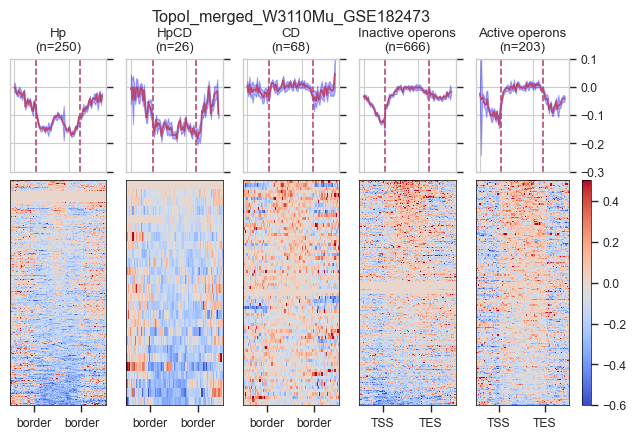

In [6]:
# protein name_rep_strain_GEO
bigwig_list = {
#               'GC_MG1655': ['MG1655.GC.50bp.bw.bigWig', 0.2,0.7,0.3,0.6],
              'TopoI_merged_W3110Mu_GSE182473': ['bw/TopoI_merged_W3110Mu_GSE182473.bw',-0.6,0.5,-0.3,0.1],
        
#               'GyrA_merged_MG1655_GSE182079': ['bw/GyrA_merged_MG1655_GSE182079.bw',0,30,0,15],
#               'GyrB_merged_MG1655_GSE182079': ['bw/GyrB_merged_MG1655_GSE182079.bw',0,80,-0.5,50],

#               'H-NS_1_MG1655_E-MTAB-332': ['bw/HnsB.blat.basecount.pruned.bw',0,1600,100,1600], #mid-exp
#               'H-NS_merged_MG1655_GSE157512': ['bw/H-NS_merged_MG1655_GSE157512.bw',-3,5,-2,4],
#               'H-NS_merged_MG1655_GSE181767': ['bw/H-NS_merged_MG1655_GSE181767.bw',-10, 800, -50, 300],
              # 'H-NS+Rif_1_MG1655_GSE157512': ['bw/H-NS+Rif_1_MG1655_GSE157512.bw',-3, 5, -2, 4],
#               'StpA_merged_MG1655_GSE181767': ['bw/StpA_merged_MG1655_GSE181767.bw',-100, 800, -50, 500],
#               'StpA_merged_MG1655_GSE157512': ['bw/StpA_merged_MG1655_GSE157512.bw',-2,3,-1,1.5],

#               'Fis_1_MG1655_E-MTAB-332': ['bw/FisB.blat.basecount.pruned.bw',0,600,100,300], #mid-exp

#               'Mukb_merged_MG1655_GSE181767': ['bw/MukB_merged_MG1655_GSE181767.bw',0, 60, -5, 30],

#               'HupA_merged_MG1655_GSE181767': ['bw/HupA_merged_MG1655_GSE181767.bw',0, 160, 30, 130],
#               'HupB_merged_MG1655_GSE181767': ['bw/HupB_merged_MG1655_GSE181767.bw',10, 130, 20, 80],
#               'GapR+FLAG_MG1655_GSE152880': ['bw/GapR_merged_MG1655_GSE152880.bw',0,0.8,0,0.4],
#               'Beta_merged_MG1655_GSE157512': ['bw/RNAPbeta_merged_MG1655_GSE157512.bw',-3,3,-1.5,1.5],
#               'RpoC_1_MG1655_Nudler': ['bw/rpoc.bw',0,6,-1.5,3],
#               'RapA_1_MG1655_Nudler': ['bw/RapA.bw',-2,8,-4,4],
#               'RedC-nacscent_MG1655_Gavrilov': ['redC/wt_merged.rna1.10k.bw.bigWig',0,20,-2,10],
              }
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
sys.path.append('/home/izhegalova/ecoli_microc/scripts/')
from functions import plot_around_loop, wrapper_stackup
nbins=81
pdf_path = "results/pileups_operons_mergedArial.Jul2.pdf"
with PdfPages(pdf_path) as pdf:   
    for id in bigwig_list.keys(): #337
        print(id)
        fig = plot_around_loop(
            path_bw='data/%s' % bigwig_list[id][0],
            plot_name=id,
            nbins=81, resolution=25,
            chrom_file=df_chromsizes,
            window=500, mode="median",
            vmin=bigwig_list[id][1],
            vmax=bigwig_list[id][2],
            ymin=bigwig_list[id][3],
            ymax=bigwig_list[id][4],
            norm=False, fill=True,
            how_far_from_edge=20,
            bed_list=[
                "data/hairpins_25.bedpe",
                "data/hTADS_25.bedpe",
                "data/TADS_25.bedpe",
                "data/operons.nascBot25.bed",
                #'data/operons.average.bed',
                'data/operons.nascTop10.bed'],
            name_list=["Hp\n(n=250)",
                "HpCD\n(n=26)",
                "CD\n(n=68)",
                "Inactive operons\n(n=666)",
                #"TU, bottom 90%,\nnot incl. zero expr.\n(n=1171)",
                "Active operons\n(n=203)"],
            pic_path='results/',
            flip_negative_strand=True,
            return_matrix=False,
            multipage=True
        )
        pdf.savefig(fig, bbox_inches="tight")

# H-NS peaks intersect with Hp centers

In [5]:
%%bash
# NC_000913.2 4639675
# !wc -l data/h-ns/HnsB.blat.basecount.pruned
source ~/.bashrc
source activate ecoli_microc;

# idr --samples data/h-ns/GSM4769084_NegRif_HNS1_peaks.bed \
# data/h-ns/GSM4769087_NegRif_HNS2_peaks.bed --input-file-type bed \
# --output-file data/h-ns/NegRif_HNS_idr_peaks.bed

In [15]:
#bedtools intersect -a data/h-ns/GSM4769084_NegRif_HNS1_peaks.bed \
# -b data/h-ns/GSM4769087_NegRif_HNS2_peaks.bed -wo > data/h-ns/NegRif_HNS_merged_peaks.bed
import sys
sys.path.append('/home/izhegalova/ecoli_microc/scripts/')
from venn_mpl import venn_mpl
from pybedtools import BedTool
Hns_bed = BedTool('data/h-ns/GSM4769084_NegRif_HNS1_peaks.bed')
Hns2_bed = BedTool('data/h-ns/GSM4769087_NegRif_HNS2_peaks.bed')
Hp_bed = BedTool('data/hairpins_25.middle.bed')

sns.set(style='white', context='poster', rc={'figure.figsize':(10,10)})
venn_mpl(Hns_bed, 
         Hns2_bed,
         Hp_bed,
         outfn='results/HNS_Hp_venn.pdf', 
         labels=['H-NS1', 'H-NS2', 'Hp'],)

In [7]:
Hp_df = bf.read_table('data/hairpins_25.bed', schema='bed')
Hp_df.head()

,chrom,start,end,name,score,strand
0,NC_000913.3,58250,59425,NaN,NaN,NaN
1,NC_000913.3,83450,85875,NaN,NaN,NaN
2,NC_000913.3,150050,152625,NaN,NaN,NaN
3,NC_000913.3,150050,153550,NaN,NaN,NaN
4,NC_000913.3,150050,154625,NaN,NaN,NaN


In [16]:
HNS_merged_peaks = bf.read_table('data/h-ns/NegRif_HNS_merged_peaks.bed', schema='bed')
tmp = bf.overlap(Hp_df, HNS_merged_peaks, how='inner', suffixes=['','_peaks'])
tmp.loc[:,['chrom_peaks', 'start_peaks', 'end_peaks']].drop_duplicates().shape

/home/izhegalova/.conda/envs/ecoli_microc/lib/python3.10/site-packages/bioframe/io/fileops.py:74: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath_or, **kwargs)


(151, 3)

/home/izhegalova/.conda/envs/ecoli_microc/lib/python3.10/site-packages/bioframe/io/fileops.py:74: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath_or, **kwargs)


233


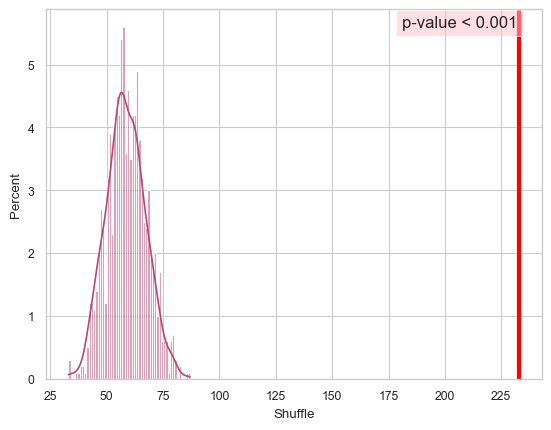

In [9]:
import sys
sys.path.append('/home/izhegalova/ecoli_microc/scripts/')
from functions import pValue_featureOccurenceInLoop
# for F in [0.01, 0.1, 0.25, 0.5]:
pValue_featureOccurenceInLoop(
        file_features="data/hairpins_25.bed",
        time=None,
        mode='whole',
        N_shuffle=1_000,
        file_loops='data/h-ns/NegRif_HNS_merged_peaks.bed', 
        name="H-NS_Hps", 
        genome_file="data/genome.chrom.sizes",
        pic_path="results",
        resolution=25, fraction=0.01, Fraction=0.1, return_df=False)

In [18]:
!wc -l data/hairpins_25.bed

250 data/hairpins_25.bed


/home/izhegalova/.conda/envs/ecoli_microc/lib/python3.10/site-packages/bioframe/io/fileops.py:74: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath_or, **kwargs)


26


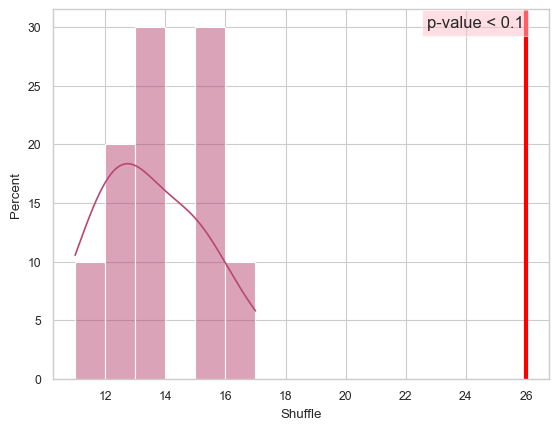

/home/izhegalova/.conda/envs/ecoli_microc/lib/python3.10/site-packages/bioframe/io/fileops.py:74: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath_or, **kwargs)


26


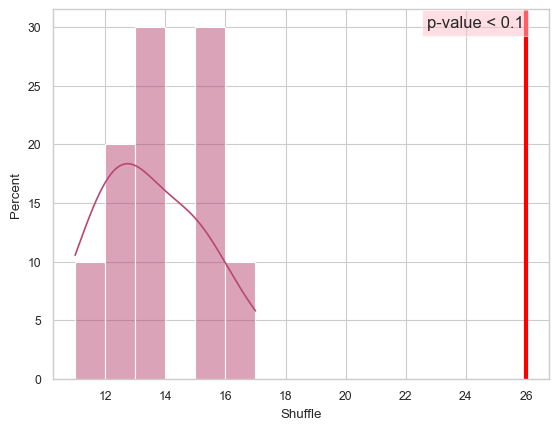

/home/izhegalova/.conda/envs/ecoli_microc/lib/python3.10/site-packages/bioframe/io/fileops.py:74: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath_or, **kwargs)


26


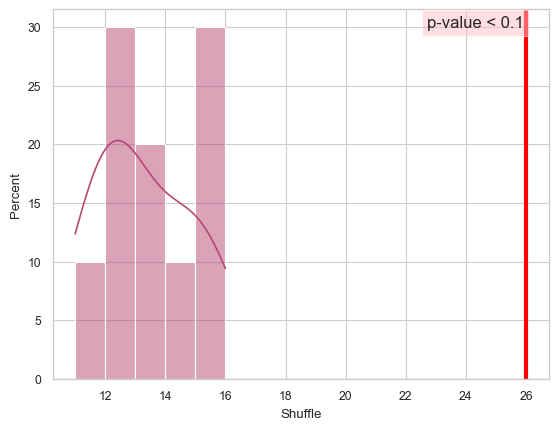

/home/izhegalova/.conda/envs/ecoli_microc/lib/python3.10/site-packages/bioframe/io/fileops.py:74: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath_or, **kwargs)


26


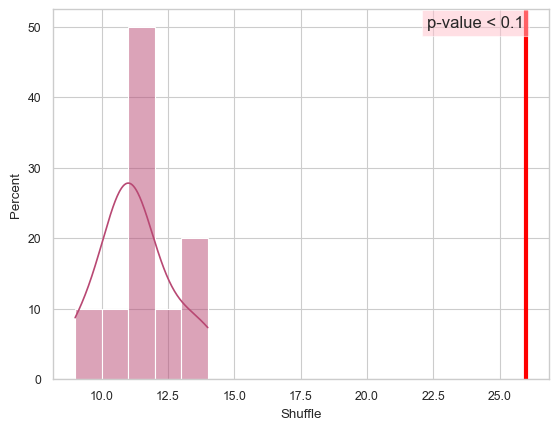

In [5]:
import sys
sys.path.append('/home/izhegalova/ecoli_microc/scripts/')
from functions import pValue_featureOccurenceInLoop
for F in [0.01, 0.1, 0.25, 0.5]:
    pValue_featureOccurenceInLoop(
            file_features="data/hTADS_25.bed",
            time=None,
            mode='whole',
            N_shuffle=10,
            file_loops='data/h-ns/NegRif_HNS_merged_peaks.bed', 
            name="H-NS_hTADs", 
            genome_file="data/genome.chrom.sizes",
            pic_path="results",
            resolution=25, fraction=0.01, Fraction=F, return_df=False)

In [13]:
!wc -l data/h-ns/NegRif_HNS_merged_peaks.bed
!wc -l data/h-ns/GSM4769084_NegRif_HNS1_peaks.bed
!wc -l data/h-ns/GSM4769087_NegRif_HNS2_peaks.bed

297 data/h-ns/NegRif_HNS_merged_peaks.bed
297 data/h-ns/GSM4769084_NegRif_HNS1_peaks.bed
304 data/h-ns/GSM4769087_NegRif_HNS2_peaks.bed


# AT shuffle

In [26]:
from pybedtools import BedTool
# df_middleOfShoulders = bf.read_table('data/hairpins_50.middleOfShouldes.bedpe', schema='bedpe')
df_middleOfShoulders_bed = BedTool('data/hairpins_50.middleOfShouldes.bed')
df_middleOfShoulders = df_middleOfShoulders_bed.to_dataframe()
df_middleOfShoulders.head()

,chrom,start,end
0,NC_000913.3,29400,29450
1,NC_000913.3,42325,42375
2,NC_000913.3,75650,75700
3,NC_000913.3,75900,75950
4,NC_000913.3,76150,76200


In [58]:
AT_df = bf.read_bigwig('data/MG1655.AT.50bp.bw.bigWig', chrom='NC_000913.3')
# AT_df.head()
AT_df.value.quantile(q=[0.5])

0.5    0.48
Name: value, dtype: float64

## Intersect

In [40]:
median_obs = bf.overlap(df_middleOfShoulders, AT_df)['value_'].median()

In [51]:
genome_file="data/genome.chrom.sizes"
inter_shuffle_vec = []
N_shuffle = 100
for i in range(N_shuffle):
    df_shuffled_bed = df_middleOfShoulders_bed.shuffle(g=genome_file, chrom=False, seed=i)
    df_shuffled = df_shuffled_bed.to_dataframe()
    median_shuffle = bf.overlap(df_shuffled, AT_df)['value_'].median()
    inter_shuffle_vec.append(median_shuffle)
    inter_shuffle_df = pd.DataFrame({"Shuffle": inter_shuffle_vec})
inter_shuffle_df.head()

,Shuffle
0,0.48
1,0.48
2,0.50
3,0.48
4,0.48


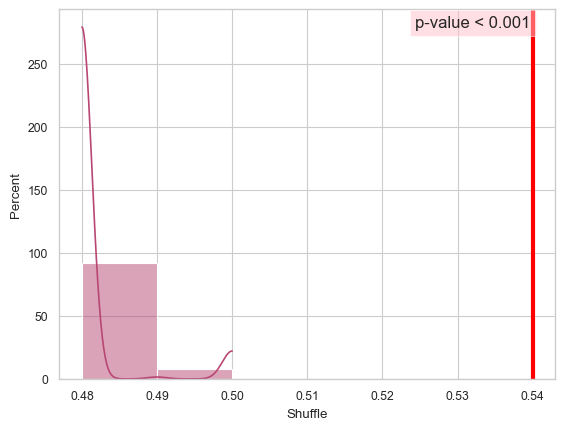

In [50]:
fig = sns.histplot(
            data=inter_shuffle_df, x="Shuffle", kde=True, stat="percent", binwidth=0.01)
fig.axvline(median_obs, color="red", lw=3)
p_value = np.round(
    np.min(
        [
            len(
                inter_shuffle_df[
                    inter_shuffle_df["Shuffle"] > median_obs
                ]
            )
            / N_shuffle,
            len(
                inter_shuffle_df[
                    inter_shuffle_df["Shuffle"] < median_obs
                ]
            )
            / N_shuffle,
        ]
    ),
    3,
)
if p_value == 0:
    p_value = 1 / N_shuffle
    plt.annotate(
        "p-value < " + str(p_value),
        xy=(0.95, 0.95),
        xycoords="axes fraction",
        bbox=dict(facecolor="pink", alpha=0.5),
        horizontalalignment="right",
        fontsize=12,
    )
else:
    plt.annotate(
        "p-value = " + str(p_value),
        xy=(0.95, 0.95),
        xycoords="axes fraction",
        bbox=dict(facecolor="pink", alpha=0.5),
        horizontalalignment="right",
        fontsize=12,
    )

plt.savefig('results/AT_shuffle.pdf', bbox_inches="tight")
plt.show()

## Peaks

In [106]:
median_gw = AT_df.value.quantile(q=0.5)
median_gw

0.47999998927116394

In [99]:
AT_peaks = AT_df.query('value > @median_gw')
AT_peaks.head()

,chrom,start,end,value
0,NC_000913.3,0,50,0.60
1,NC_000913.3,50,100,0.56
2,NC_000913.3,100,150,0.76
3,NC_000913.3,150,200,0.60
6,NC_000913.3,300,350,0.60


In [100]:
AT_peaks_clusters = bf.merge(AT_peaks, min_dist=1).query('n_intervals > 2')
AT_peaks_clusters.head()
AT_peaks_clusters.to_csv('data/AT_peaks_clusters.bed', sep='\t', index=False, header=False) 

In [101]:
AT_peaks_clusters.shape

(1626, 4)

108


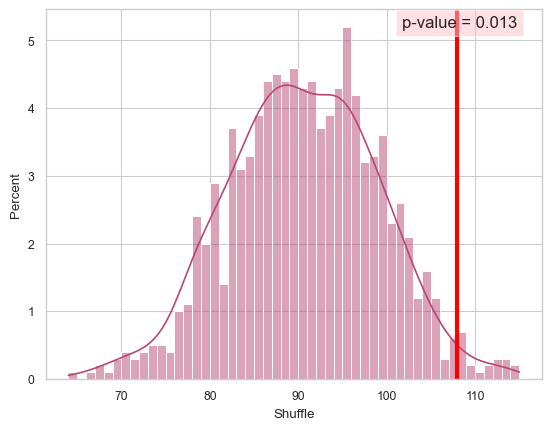

In [96]:
import sys
sys.path.append('/home/izhegalova/ecoli_microc/scripts/')
from functions import pValue_featureOccurenceInLoop
pValue_featureOccurenceInLoop(
        file_loops="data/hairpins_50.middleOfShouldes.bed", #"data/hairpins_25.bed",
        time=None,
        mode='whole',
        N_shuffle=1_000,
        file_features='data/AT_peaks_clusters.bed', 
        name="AT_HpsMid.q50", 
        genome_file="data/genome.chrom.sizes",
        pic_path="results",
        resolution=25, fraction=0.1, Fraction=0.1, return_df=False)